# E-commerce Marketing and Sales Case Study

In [106]:
import pandas as pd 
import numpy as np 

In [107]:
# show all columns
pd.set_option('display.max_columns', None)

# optionally, also show all rows
pd.set_option('display.max_rows', None)

# and prevent column wrapping in narrow consoles
pd.set_option('display.width', None)

In [108]:
!pwd

/Users/apple/Desktop/03_Learning/01_SCALER/99_Business_case


In [109]:
!ls /Users/apple/Desktop/03_Learning/01_SCALER/99_Business_case/Data/

CustomersData.xlsx       Discount_Coupon.csv      Online_Sales.csv
Dataset Description.docx Marketing_Spend.csv      Tax_amount.xlsx


#### Customer data 

In [110]:

cust_df = pd.read_excel("/Users/apple/Desktop/03_Learning/01_SCALER/99_Business_case/Data/CustomersData.xlsx")
print(f"cust_df shape: {cust_df.shape}") 
print("*"*40)
print(cust_df.head()) 
print("*"*40)
cust_df.info() 
print("*"*40)
cust_df.describe(include="all") 

cust_df shape: (1468, 4)
****************************************
   CustomerID Gender    Location  Tenure_Months
0       17850      M     Chicago             12
1       13047      M  California             43
2       12583      M     Chicago             33
3       13748      F  California             30
4       15100      M  California             49
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB
****************************************


,CustomerID,Gender,Location,Tenure_Months
count,1468.000000,1468,1468,1468.000000
unique,NaN,2,5,NaN
top,NaN,F,California,NaN
freq,NaN,934,464,NaN
mean,15314.386240,NaN,NaN,25.912125
std,1744.000367,NaN,NaN,13.959667
min,12346.000000,NaN,NaN,2.000000
25%,13830.500000,NaN,NaN,14.000000
50%,15300.000000,NaN,NaN,26.000000
75%,16882.250000,NaN,NaN,38.000000


#### Discount data 

In [111]:

discount_df = pd.read_csv("/Users/apple/Desktop/03_Learning/01_SCALER/99_Business_case/Data/Discount_Coupon.csv")
print(f"discount_df shape: {discount_df.shape}") 
print("*"*40)
print(discount_df.head()) 
print("*"*40)
discount_df.info() 
print("*"*40)
discount_df.describe(include="all") 

discount_df shape: (204, 4)
****************************************
  Month Product_Category Coupon_Code  Discount_pct
0   Jan          Apparel      SALE10            10
1   Feb          Apparel      SALE20            20
2   Mar          Apparel      SALE30            30
3   Jan         Nest-USA      ELEC10            10
4   Feb         Nest-USA      ELEC20            20
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB
****************************************


,Month,Product_Category,Coupon_Code,Discount_pct
count,204,204,204,204.000000
unique,12,17,48,NaN
top,Jan,Apparel,EXTRA10,NaN
freq,17,12,8,NaN
mean,NaN,NaN,NaN,20.000000
std,NaN,NaN,NaN,8.185052
min,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,10.000000
50%,NaN,NaN,NaN,20.000000
75%,NaN,NaN,NaN,30.000000


In [112]:
# Convert Month values in discount_df from names to numbers
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

discount_df['Month'] = discount_df['Month'].map(month_map) 
print(discount_df[['Month']].value_counts())
discount_df['Month'] = discount_df['Month'].astype(str)
print("*"*40)
print(discount_df[['Month']].head())

Month
1        17
2        17
3        17
4        17
5        17
6        17
7        17
8        17
9        17
10       17
11       17
12       17
Name: count, dtype: int64
****************************************
  Month
0     1
1     2
2     3
3     1
4     2


#### Marketing_Spend data 

In [113]:

mkt_df = pd.read_csv("/Users/apple/Desktop/03_Learning/01_SCALER/99_Business_case/Data/Marketing_Spend.csv")
print(f"Marketing_Spend shape: {mkt_df.shape}") 
print("*"*40)
print(mkt_df.head()) 
print("*"*40)
mkt_df.info() 
print("*"*40)
mkt_df.describe(include="all") 

Marketing_Spend shape: (365, 3)
****************************************
       Date  Offline_Spend  Online_Spend
0  1/1/2019           4500       2424.50
1  1/2/2019           4500       3480.36
2  1/3/2019           4500       1576.38
3  1/4/2019           4500       2928.55
4  1/5/2019           4500       4055.30
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB
****************************************


,Date,Offline_Spend,Online_Spend
count,365,365.000000,365.000000
unique,365,NaN,NaN
top,1/1/2019,NaN,NaN
freq,1,NaN,NaN
mean,NaN,2843.561644,1905.880740
std,NaN,952.292448,808.856853
min,NaN,500.000000,320.250000
25%,NaN,2500.000000,1258.600000
50%,NaN,3000.000000,1881.940000
75%,NaN,3500.000000,2435.120000


In [114]:
# # Convert the date column in mkt_df to datetime 
mkt_df['Date'] = pd.to_datetime(mkt_df['Date'], errors='coerce')

# # Extract month as a new column
# mkt_df['Month'] = mkt_df['Date'].dt.month

# # Preview changes
print(mkt_df.head())
# print("*"*40)
# print(mkt_df['Month'].value_counts())

        Date  Offline_Spend  Online_Spend
0 2019-01-01           4500       2424.50
1 2019-01-02           4500       3480.36
2 2019-01-03           4500       1576.38
3 2019-01-04           4500       2928.55
4 2019-01-05           4500       4055.30


##### Online_Sales data 

In [115]:

sales_df = pd.read_csv("/Users/apple/Desktop/03_Learning/01_SCALER/99_Business_case/Data/Online_Sales.csv")
print(f"Online_Sales shape: {sales_df.shape}") 
print("*"*40)
print(sales_df.head()) 
print("*"*40)
sales_df.info() 
print("*"*40) 
sales_df.describe(include="all") 

Online_Sales shape: (52924, 10)
****************************************
   CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0       17850           16679         1/1/2019  GGOENEBJ079499   
1       17850           16680         1/1/2019  GGOENEBJ079499   
2       17850           16681         1/1/2019  GGOEGFKQ020399   
3       17850           16682         1/1/2019  GGOEGAAB010516   
4       17850           16682         1/1/2019  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  
0         1     153.71            

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
count,52924.00000,52924.000000,52924,52924,52924,52924,52924.000000,52924.000000,52924.000000,52924
unique,NaN,NaN,365,1145,404,20,NaN,NaN,NaN,3
top,NaN,NaN,11/27/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Apparel,NaN,NaN,NaN,Clicked
freq,NaN,NaN,335,3511,3511,18126,NaN,NaN,NaN,26926
mean,15346.70981,32409.825675,NaN,NaN,NaN,NaN,4.497638,52.237646,10.517630,NaN
std,1766.55602,8648.668977,NaN,NaN,NaN,NaN,20.104711,64.006882,19.475613,NaN
min,12346.00000,16679.000000,NaN,NaN,NaN,NaN,1.000000,0.390000,0.000000,NaN
25%,13869.00000,25384.000000,NaN,NaN,NaN,NaN,1.000000,5.700000,6.000000,NaN
50%,15311.00000,32625.500000,NaN,NaN,NaN,NaN,1.000000,16.990000,6.000000,NaN
75%,16996.25000,39126.250000,NaN,NaN,NaN,NaN,2.000000,102.130000,6.500000,NaN


#### Tax_amount data 

In [116]:

tax_df = pd.read_excel("/Users/apple/Desktop/03_Learning/01_SCALER/99_Business_case/Data/Tax_amount.xlsx")
print(f"Tax_amount shape: {tax_df.shape}") 
print("*"*40)
print(tax_df.head()) 
print("*"*40)
tax_df.info() 
print("*"*40) 
tax_df.describe(include="all") 

Tax_amount shape: (20, 2)
****************************************
  Product_Category   GST
0         Nest-USA  0.10
1           Office  0.10
2          Apparel  0.18
3             Bags  0.18
4        Drinkware  0.18
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 452.0+ bytes
****************************************


,Product_Category,GST
count,20,20.000000
unique,20,NaN
top,Nest-USA,NaN
freq,1,NaN
mean,NaN,0.116500
std,NaN,0.052443
min,NaN,0.050000
25%,NaN,0.087500
50%,NaN,0.100000
75%,NaN,0.180000


#### Missing value checks

In [117]:

# print(cust_df.head())
print(cust_df.isnull().sum())
print("*"*40)
# print(discount_df.head())
print(discount_df.isnull().sum())
print("*"*40)
# print(mkt_df.head())
print(mkt_df.isnull().sum())
print("*"*40)
# print(sales_df.head())
print(sales_df.isnull().sum())
print("*"*40)
# print(tax_df.head())
print(tax_df.isnull().sum())

CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64
****************************************
Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64
****************************************
Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64
****************************************
CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64
****************************************
Product_Category    0
GST                 0
dtype: int64


In [118]:
# Preview and missing value (null/NaN) check for all dataframes

print("CustomersData Preview:")
# print(cust_df.head())
print("Missing values per column (null/NaN):")
print(cust_df.isna().sum())
print("*" * 40)

print("Discount_Coupon Preview:")
# print(discount_df.head())
print("Missing values per column (null/NaN):")
print(discount_df.isna().sum())
print("*" * 40)

print("Marketing_Spend Preview:")
# print(mkt_df.head())
print("Missing values per column (null/NaN):")
print(mkt_df.isna().sum())
print("*" * 40)

print("Online_Sales Preview:")
# print(sales_df.head())
print("Missing values per column (null/NaN):")
print(sales_df.isna().sum())
print("*" * 40)

print("Tax_amount Preview:")
# print(tax_df.head())
print("Missing values per column (null/NaN):")
print(tax_df.isna().sum())
print("*" * 40)

CustomersData Preview:
Missing values per column (null/NaN):
CustomerID       0
Gender           0
Location         0
Tenure_Months    0
dtype: int64
****************************************
Discount_Coupon Preview:
Missing values per column (null/NaN):
Month               0
Product_Category    0
Coupon_Code         0
Discount_pct        0
dtype: int64
****************************************
Marketing_Spend Preview:
Missing values per column (null/NaN):
Date             0
Offline_Spend    0
Online_Spend     0
dtype: int64
****************************************
Online_Sales Preview:
Missing values per column (null/NaN):
CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
dtype: int64
****************************************
Tax_amount Preview:
Missing values per column (null/NaN):
Product_

#### Consider conversions for identifiers

In [119]:
cust_df['CustomerID'] = cust_df['CustomerID'].astype(str) 
sales_df['Transaction_ID'] = sales_df['Transaction_Date'].astype(str) 

#### Address missing values

In [120]:
cust_df = cust_df.dropna()  # or use fillna() as appropriate
print(f"cust_df shape after handling missing values: {cust_df.shape}")

cust_df shape after handling missing values: (1468, 4)


In [121]:
print(f"mkt_df shape before handling missing values: {mkt_df.shape}")
mkt_df = mkt_df.dropna()  # or use fillna() as appropriate
print(f"mkt_df shape after handling missing values: {mkt_df.shape}")

mkt_df shape before handling missing values: (365, 3)
mkt_df shape after handling missing values: (365, 3)


# Date Handling:

In [122]:
# Example for Online_Sales dataframe
# Convert 'Transaction_Date' to datetime
sales_df['Transaction_Date'] = pd.to_datetime(sales_df['Transaction_Date'], errors='coerce')

# Extract Year, Month, and Day as new columns
sales_df['Year'] = sales_df['Transaction_Date'].dt.year
sales_df['Month'] = sales_df['Transaction_Date'].dt.month
sales_df['Day'] = sales_df['Transaction_Date'].dt.day

sales_df['Month'] = sales_df['Month'].astype(str)

# Preview changes
print(sales_df[['Transaction_Date', 'Year', 'Month', 'Day']].head())

  Transaction_Date  Year Month  Day
0       2019-01-01  2019     1    1
1       2019-01-01  2019     1    1
2       2019-01-01  2019     1    1
3       2019-01-01  2019     1    1
4       2019-01-01  2019     1    1


# Data Merging:


In [123]:
print(sales_df.head(2))
print("*"*40)
print(discount_df.head(2))
print("*"*40)
print(mkt_df.head(2))

   CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0       17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1       17850       1/1/2019       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year Month  Day  
0         1     153.71               6.5          Used  2019     1    1  
1         1     153.71               6.5          Used  2019     1    1  
****************************************
  Month Product_Category Coupon_Code  Discount_pct
0     1          Apparel      SALE10            10
1     2          Apparel      SALE20            20
****************************************
        Date  Offline_Spend  Online_Spend
0 2019-01-01           4500       2424.50
1 2019-01-02           4500       3480.36


In [124]:
# Merge sales and tax data on Transaction_ID
merged_sales_tax = pd.merge(sales_df, tax_df, on='Product_Category', how='left')
print(f"merged_sales_tax shape: {merged_sales_tax.shape}")
print("*"*40) 
print(merged_sales_tax.head())

merged_sales_tax shape: (52924, 14)
****************************************
   CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0       17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1       17850       1/1/2019       2019-01-01  GGOENEBJ079499   
2       17850       1/1/2019       2019-01-01  GGOEGFKQ020399   
3       17850       1/1/2019       2019-01-01  GGOEGAAB010516   
4       17850       1/1/2019       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year Month  Day   GST  
0         1  

In [125]:
print(discount_df.dtypes)
print("*"*40)
print(merged_sales_tax.dtypes) 

Month               object
Product_Category    object
Coupon_Code         object
Discount_pct         int64
dtype: object
****************************************
CustomerID                      int64
Transaction_ID                 object
Transaction_Date       datetime64[ns]
Product_SKU                    object
Product_Description            object
Product_Category               object
Quantity                        int64
Avg_Price                     float64
Delivery_Charges              float64
Coupon_Status                  object
Year                            int32
Month                          object
Day                             int32
GST                           float64
dtype: object


In [126]:
# Merge sales and tax data on Transaction_ID
merged_sales_tax_disc = pd.merge(merged_sales_tax, discount_df, on=['Product_Category', 'Month'], how='left')
print(f"merged_sales_tax_disc shape: {merged_sales_tax_disc.shape}")
print("*"*40) 
print(merged_sales_tax_disc.head()) 

merged_sales_tax_disc shape: (52924, 16)
****************************************
   CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0       17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1       17850       1/1/2019       2019-01-01  GGOENEBJ079499   
2       17850       1/1/2019       2019-01-01  GGOEGFKQ020399   
3       17850       1/1/2019       2019-01-01  GGOEGAAB010516   
4       17850       1/1/2019       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year Month  Day   GST  \
0      

In [127]:
# Merge sales and tax data on Transaction_ID
merged_sales_tax_disc_mkt = pd.merge(merged_sales_tax_disc, mkt_df, left_on=['Transaction_Date'], right_on=['Date'], how='left')
print(f"merged_sales_tax_disc_mkt shape: {merged_sales_tax_disc_mkt.shape}")
print("*"*40) 
print(merged_sales_tax_disc_mkt.head()) 

merged_sales_tax_disc_mkt shape: (52924, 19)
****************************************
   CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0       17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1       17850       1/1/2019       2019-01-01  GGOENEBJ079499   
2       17850       1/1/2019       2019-01-01  GGOEGFKQ020399   
3       17850       1/1/2019       2019-01-01  GGOEGAAB010516   
4       17850       1/1/2019       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year Month  Day   GST  \
0  

In [128]:
print(cust_df.info())
print("*"*40)
merged_sales_tax_disc_mkt['CustomerID'] = merged_sales_tax_disc_mkt['CustomerID'].astype(str) 
print(merged_sales_tax_disc_mkt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   object
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.0+ KB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  object        
 1   Transaction_ID       52924 non-null  object        
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924

In [129]:
# Merge customer and sales data on CustomerID
merged_df = pd.merge(merged_sales_tax_disc_mkt, cust_df, on='CustomerID', how='left')
print(merged_df.head()) 

  CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1      17850       1/1/2019       2019-01-01  GGOENEBJ079499   
2      17850       1/1/2019       2019-01-01  GGOEGFKQ020399   
3      17850       1/1/2019       2019-01-01  GGOEGAAB010516   
4      17850       1/1/2019       2019-01-01  GGOEGBJL013999   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   
3  Google Men's 100% Cotton Short Sleeve Hero Tee...          Apparel   
4                    Google Canvas Tote Natural/Navy             Bags   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year Month  Day   GST  \
0         1     153.71               6.5          Used  2019     1    1  0.10   
1         1   

# Calculate Core Metrics:



In [131]:
print(merged_df.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months'],
      dtype='object')


In [132]:
# Calculate Invoice Value (revenue) for each transaction
# Ensure Discount_pct is in decimal form (e.g., 0.15 for 15%)
# GST should also be in decimal form (e.g., 0.18 for 18%)

merged_df['Invoice_Value'] = (
    (merged_df['Quantity'] * merged_df['Avg_Price']) *
    (1 - merged_df['Discount_pct']/100) *
    (1 + merged_df['GST'])
) + merged_df['Delivery_Charges']

print(merged_df[['Quantity', 'Avg_Price', 'Discount_pct', 'GST', 'Delivery_Charges', 'Invoice_Value']].head())

   Quantity  Avg_Price  Discount_pct   GST  Delivery_Charges  Invoice_Value
0         1     153.71          10.0  0.10               6.5       158.6729
1         1     153.71          10.0  0.10               6.5       158.6729
2         1       2.05          10.0  0.10               6.5         8.5295
3         5      17.53          10.0  0.18               6.5        99.5843
4         1      16.50          10.0  0.18               6.5        24.0230


# Identify the months with the highest and lowest customer acquisition count. What strategies could be implemented to address the fluctuations and ensure consistent growth throughout the year?


In [134]:
# Identify the month of first purchase for each customer
first_purchase = merged_df.groupby('CustomerID')['Transaction_Date'].min().reset_index()

# Extract month from the first purchase date
first_purchase['Acquisition_Month'] = pd.to_datetime(first_purchase['Transaction_Date']).dt.month

# Count acquisitions per month
monthly_acquisition = first_purchase['Acquisition_Month'].value_counts().sort_index()

print("Monthly customer acquisition counts:")
print(monthly_acquisition)

# Identify highest and lowest acquisition months
highest_month = monthly_acquisition.idxmax()
lowest_month = monthly_acquisition.idxmin()
print("*"*40)
print(f"Highest acquisition month: {highest_month} ({monthly_acquisition[highest_month]} customers)")
print("*"*40)
print(f"Lowest acquisition month: {lowest_month} ({monthly_acquisition[lowest_month]} customers)")

Monthly customer acquisition counts:
Acquisition_Month
1     215
2      96
3     177
4     163
5     112
6     137
7      94
8     135
9      78
10     87
11     68
12    106
Name: count, dtype: int64
****************************************
Highest acquisition month: 1 (215 customers)
****************************************
Lowest acquisition month: 11 (68 customers)


Strategy suggestions:

For low acquisition months: Increase marketing spend, launch special offers, or targeted campaigns.
For high acquisition months: Analyze what worked and replicate successful strategies in other months.
Maintain consistent engagement and incentives throughout the year.


# Analyze the data to determine if certain months consistently show higher or lower acquisition. How can the company capitalize on high-performing months and improve performance during slower periods? 



In [135]:
print(f"Year range: {merged_df['Year'].min()} to {merged_df['Year'].max()}")

Year range: 2019 to 2019


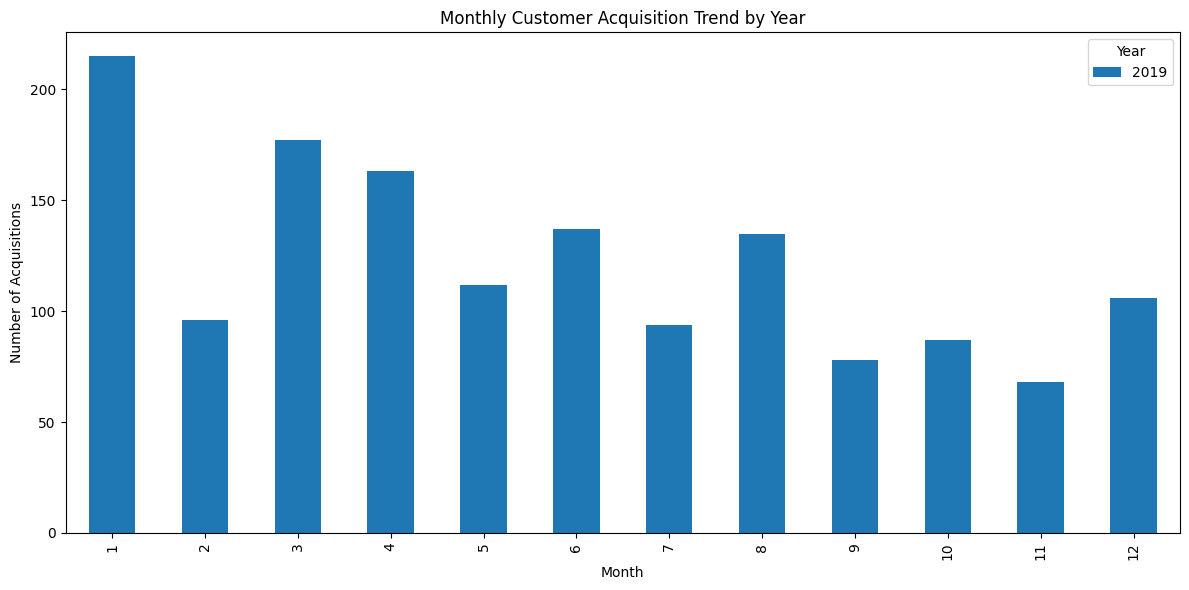

                   Mean_Acquisition
Acquisition_Month                  
1                             215.0
2                              96.0
3                             177.0
4                             163.0
5                             112.0
6                             137.0
7                              94.0
8                             135.0
9                              78.0
10                             87.0
11                             68.0
12                            106.0
Consistently high-performing months:
                    Mean_Acquisition
Acquisition_Month                  
1                             215.0
Consistently low-performing months:
                    Mean_Acquisition
Acquisition_Month                  
11                             68.0

Recommendations:
- For high-performing months: Analyze marketing spend, campaigns, or product launches during these periods (see mkt_df and discount_df). Replicate successful strategies in other months.
-

In [136]:
# Analyze recurring patterns in monthly acquisition

import matplotlib.pyplot as plt

# If you have multiple years, extract year as well
first_purchase['Year'] = pd.to_datetime(first_purchase['Transaction_Date']).dt.year

# Group by year and month for trend analysis
monthly_acquisition_trend = first_purchase.groupby(['Year', 'Acquisition_Month']).size().unstack(fill_value=0)

# Plot acquisition trends by month across years
monthly_acquisition_trend.T.plot(kind='bar', figsize=(12,6))
plt.title('Monthly Customer Acquisition Trend by Year')
plt.xlabel('Month')
plt.ylabel('Number of Acquisitions')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

# Calculate mean and std deviation for each month
month_stats = monthly_acquisition_trend.mean(axis=0).to_frame('Mean_Acquisition')
# month_stats['Std_Acquisition'] = monthly_acquisition_trend.std(axis=0)
print(month_stats)

# Identify consistently high/low months
high_months = month_stats[month_stats['Mean_Acquisition'] == month_stats['Mean_Acquisition'].max()]
low_months = month_stats[month_stats['Mean_Acquisition'] == month_stats['Mean_Acquisition'].min()]
print("Consistently high-performing months:\n", high_months)
print("Consistently low-performing months:\n", low_months)

# Strategic recommendations:
print("""
Recommendations:
- For high-performing months: Analyze marketing spend, campaigns, or product launches during these periods (see mkt_df and discount_df). Replicate successful strategies in other months.
- For slower months: Increase targeted marketing, introduce special offers, or time product launches to stimulate demand.
- Use insights from discount and marketing spend data to correlate acquisition spikes with specific actions.
""")

# 3. Identify periods with the strongest and weakest retention rates. What strategies could be implemented to improve retention during weaker months?


In [138]:
# Calculate monthly retention rates

# Ensure Transaction_Date is datetime and Month is integer
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'], errors='coerce')
merged_df['Month'] = merged_df['Transaction_Date'].dt.month

# Get unique customers per month
monthly_customers = merged_df.groupby('Month')['CustomerID'].unique()

# Calculate retention rate for each month (except last month)
retention_rates = {}
for month in range(1, 12):  # Months 1 to 11
    current_customers = set(monthly_customers.get(month, []))
    next_customers = set(monthly_customers.get(month + 1, []))
    if len(current_customers) == 0:
        retention_rates[month] = np.nan
    else:
        retained = len(current_customers & next_customers)
        retention_rates[month] = retained / len(current_customers)

# Convert to DataFrame for easy viewing
retention_df = pd.DataFrame(list(retention_rates.items()), columns=['Month', 'Retention_Rate'])
print(retention_df)

# Identify strongest and weakest retention months
strongest = retention_df.loc[retention_df['Retention_Rate'].idxmax()]
weakest = retention_df.loc[retention_df['Retention_Rate'].idxmin()]
print(f"Strongest retention: Month {int(strongest['Month'])} ({strongest['Retention_Rate']:.2f})")
print(f"Weakest retention: Month {int(weakest['Month'])} ({weakest['Retention_Rate']:.2f})")

# Strategy suggestions:
print("""
Strategies to improve retention in weaker months:
- Launch re-engagement campaigns (email, SMS, app notifications).
- Offer loyalty rewards or discounts for repeat purchases.
- Analyze feedback and reasons for churn, address pain points.
- Increase customer support and personalized communication.
""")

    Month  Retention_Rate
0       1        0.060465
1       2        0.100917
2       3        0.115385
3       4        0.111607
4       5        0.185000
5       6        0.223938
6       7        0.275424
7       8        0.146667
8       9        0.150259
9      10        0.147619
10     11        0.148936
Strongest retention: Month 7 (0.28)
Weakest retention: Month 1 (0.06)

Strategies to improve retention in weaker months:
- Launch re-engagement campaigns (email, SMS, app notifications).
- Offer loyalty rewards or discounts for repeat purchases.
- Analyze feedback and reasons for churn, address pain points.
- Increase customer support and personalized communication.



# Analyze customer behavior during high-retention months and suggest ways to replicate this success throughout the year.

In [139]:
# Analyze customer behavior during high-retention months

# Get the month(s) with strongest retention
high_retention_month = int(strongest['Month'])

# Filter sales for high-retention month
high_month_sales = merged_df[merged_df['Month'] == high_retention_month]

# Analyze product categories, discounts, and transaction values
print("Product category distribution in high-retention month:")
print(high_month_sales['Product_Category'].value_counts())



Product category distribution in high-retention month:
Product_Category
Apparel                 2182
Nest-USA                1161
Office                   549
Lifestyle                383
Drinkware                298
Bags                     216
Notebooks & Journals     150
Headgear                 119
Bottles                   40
Fun                       35
Nest-Canada               27
Waze                      25
Housewares                22
Google                    12
Gift Cards                10
Backpacks                  8
Android                    8
Accessories                6
Name: count, dtype: int64


In [140]:
print(high_month_sales.columns)
print("*"*40) 
high_month_sales.head(3)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value'],
      dtype='object')
****************************************


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Year,Month,Day,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,Gender,Location,Tenure_Months,Invoice_Value
24608,17841,7/1/2019,2019-07-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,2,149.0,6.0,Clicked,2019,7,1,0.1,ELEC10,10.0,2019-07-01,1500,1932.64,M,California,21,301.02
24609,17841,7/1/2019,2019-07-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.0,6.0,Used,2019,7,1,0.1,ELEC10,10.0,2019-07-01,1500,1932.64,M,California,21,123.81
24610,17841,7/1/2019,2019-07-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,119.0,6.0,Not Used,2019,7,1,0.1,ELEC10,10.0,2019-07-01,1500,1932.64,M,California,21,241.62


In [141]:
print("\nDiscount statistics in high-retention month:")
if 'Discount_pct' in high_month_sales.columns:
    print(high_month_sales['Discount_pct'].describe())
else:
    print("Discount_pct column not found.")

print("\nTransaction value statistics in high-retention month:")
if 'Invoice_Value' in high_month_sales.columns:
    print(high_month_sales['Invoice_Value'].describe())
else:
    print("Invoice_Value column not found.")

# Strategy suggestions
print("""
To replicate high-retention success:
- Promote popular product categories from high-retention months in other months.
- Offer similar discount levels or targeted promotions.
- Maintain or improve transaction value through bundled offers or loyalty incentives.
- Analyze marketing and engagement activities from high-retention periods and apply them year-round.
""")


Discount statistics in high-retention month:
count    5196.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: Discount_pct, dtype: float64

Transaction value statistics in high-retention month:
count    5196.000000
mean       80.789878
std       160.287300
min         6.980100
25%        16.301445
50%        27.229380
75%       123.810000
max      4255.665000
Name: Invoice_Value, dtype: float64

To replicate high-retention success:
- Promote popular product categories from high-retention months in other months.
- Offer similar discount levels or targeted promotions.
- Maintain or improve transaction value through bundled offers or loyalty incentives.
- Analyze marketing and engagement activities from high-retention periods and apply them year-round.



In [142]:
print(merged_df.head(2))
print("*"*40) 
print(first_purchase.head(2))
print("*"*40)
print(monthly_acquisition.head(2)) 

  CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1      17850       1/1/2019       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year  Month  Day  GST  \
0         1     153.71               6.5          Used  2019      1    1  0.1   
1         1     153.71               6.5          Used  2019      1    1  0.1   

  Coupon_Code  Discount_pct       Date  Offline_Spend  Online_Spend Gender  \
0      ELEC10          10.0 2019-01-01           4500        2424.5      M   
1      ELEC10          10.0 2019-01-01           4500        2424.5      M   

  Location  Tenure_Months  Invoice_Value  
0  Chicago             12       158.6729  
1  Chicago            

# Compare the revenue generated by new and existing customers month-over-month. What does this trend suggest about the balance between acquisition and retention efforts?


In [147]:
print(merged_df.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type'],
      dtype='object')


In [ ]:
# 🧩 Step 1: Prepare date columns and month key
# Make sure your Transaction_Date is in datetime format and create a Month column.
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])
merged_df['Month'] = merged_df['Transaction_Date'].dt.to_period('M')
# 🧩 Step 2: Add each customer’s first purchase month
# You already have this in first_purchase, but if not, you can compute it like so:
first_purchase = merged_df.groupby('CustomerID')['Month'].min().reset_index()
first_purchase.rename(columns={'Month': 'First_Month'}, inplace=True)
# Now merge it into your main DataFrame:
merged_df = merged_df.merge(first_purchase, on='CustomerID', how='left')
# 🧩 Step 3: Classify customers as New or Existing
# A “new” customer in month X means Month == First_Month; otherwise, they’re “existing”.
merged_df['Customer_Type'] = merged_df.apply(
    lambda x: 'New' if x['Month'] == x['First_Month'] else 'Existing', axis=1
)
# 🧩 Step 4: Aggregate monthly revenue
# Now, sum up Invoice_Value (or total spend) per month by customer type.
monthly_revenue = (
    merged_df.groupby(['Month', 'Customer_Type'])['Invoice_Value']
    .sum()
    .reset_index()
    .pivot(index='Month', columns='Customer_Type', values='Invoice_Value')
    .fillna(0)
)
print(monthly_revenue)


Customer_Type      Existing           New
Month                                    
2019-01             0.00000  460087.03245
2019-02         40930.36168  283400.30552
2019-03         54433.58872  276490.38271
2019-04        180890.84676  261083.53827
2019-05        113224.55648  200413.41288
2019-06        116242.68791  170882.56280
2019-07        252991.58518  166792.62243
2019-08        216228.51744  199470.65440
2019-09        188647.56623  131400.65575
2019-10        208591.80921  240347.30434
2019-11        271398.88968  204083.30768
2019-12        231258.09054  208271.93961


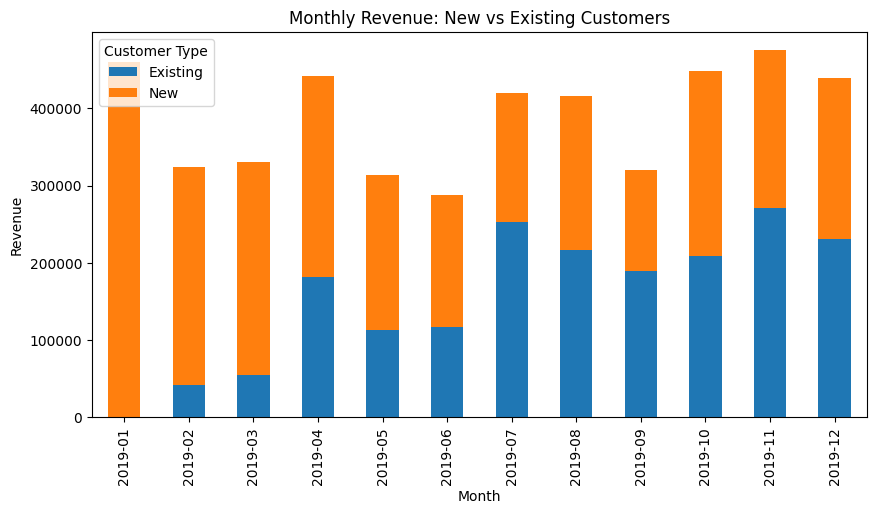

In [144]:
# Step 5: Visualize the trend
import matplotlib.pyplot as plt

monthly_revenue.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Monthly Revenue: New vs Existing Customers')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Customer Type')
plt.show()


In [ ]:
# For first quarter, Business is expanding primarily through acquisition, but retention might be weak. 
# This could be observed because we have data starting january and no prior information is available. 
# If “Existing” revenue dominates:
# For remaining three quarters, Healthy mix — continuous inflow of new customers while retaining older ones.


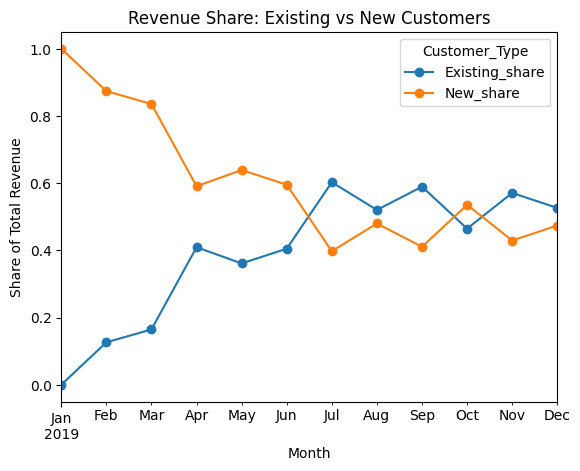

In [146]:
monthly_revenue['Existing_share'] = (
    monthly_revenue['Existing'] / 
    (monthly_revenue['Existing'] + monthly_revenue['New'])
)
monthly_revenue['New_share'] = 1 - monthly_revenue['Existing_share']
# Then plot the share trend:
monthly_revenue[['Existing_share', 'New_share']].plot(marker='o')
plt.title('Revenue Share: Existing vs New Customers')
plt.ylabel('Share of Total Revenue')
plt.show()

# 6. Analyze the relationship between coupon usage and revenue generation. How can discount strategies be optimized to maximize revenue while maintaining profitability?

In [172]:
print(merged_df.columns)
merged_df.head(2)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type'],
      dtype='object')


,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Year,Month,Day,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,Gender,Location,Tenure_Months,Invoice_Value,First_Month,Customer_Type
0,17850,1/1/2019,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,used,2019,2019-01,1,0.1,ELEC10,10.0,2019-01-01,4500,2424.5,M,Chicago,12,158.6729,2019-01,New
1,17850,1/1/2019,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,used,2019,2019-01,1,0.1,ELEC10,10.0,2019-01-01,4500,2424.5,M,Chicago,12,158.6729,2019-01,New


In [173]:
# Step 1: Prepare the Data
# Make sure Invoice_Value is numeric and clean up Coupon_Status (like “Used”, “Not Used”). 
merged_df['Invoice_Value'] = merged_df['Invoice_Value'].astype(float)
merged_df['Coupon_Status'] = merged_df['Coupon_Status'].str.strip().str.lower()

In [174]:
# Step 2: Compare Revenue Share (Coupon vs Non-Coupon)
# Compute the revenue share for coupon and non-coupon transactions:
revenue_by_coupon = (
    merged_df.groupby('Coupon_Status')['Invoice_Value']
    .sum()
    .reset_index()
    .rename(columns={'Invoice_Value': 'Total_Revenue'})
)

revenue_by_coupon['Revenue_Share_perc'] = (
    revenue_by_coupon['Total_Revenue'] / revenue_by_coupon['Total_Revenue'].sum() * 100
)

print(revenue_by_coupon)

  Coupon_Status  Total_Revenue  Revenue_Share_perc
0       clicked   2.387968e+06           51.051544
1      not used   7.271574e+05           15.545649
2          used   1.562437e+06           33.402806


In [175]:
# Step 3: Compare Average Transaction Value (ATV)
# Check whether coupon users spend more or less per order.
avg_value = (
    merged_df.groupby('Coupon_Status')['Invoice_Value']
    .mean()
    .reset_index()
    .rename(columns={'Invoice_Value': 'Avg_Transaction_Value'})
)
print(avg_value)


  Coupon_Status  Avg_Transaction_Value
0       clicked              89.370050
1      not used              90.600227
2          used              87.885986


/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/751593365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_value, x='Coupon_Status', y='Avg_Transaction_Value', palette='coolwarm')


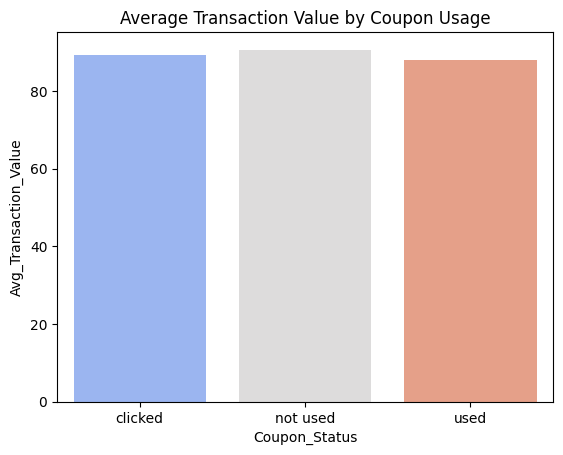

In [176]:
# You can also visualize this difference:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=avg_value, x='Coupon_Status', y='Avg_Transaction_Value', palette='coolwarm')
plt.title("Average Transaction Value by Coupon Usage")
plt.show()

In [177]:
# Step 4: Check Statistical Significance (T-Test)
# Use a t-test to see if coupon users and non-coupon users spend differently in a statistically significant way.
from scipy.stats import ttest_ind

coupon_values = merged_df[merged_df['Coupon_Status'] == 'used']['Invoice_Value']
non_coupon_values = merged_df[merged_df['Coupon_Status'] != 'used']['Invoice_Value']

t_stat, p_val = ttest_ind(coupon_values, non_coupon_values, equal_var=False, nan_policy='omit')
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

T-statistic: -1.24, P-value: 0.2143


In [178]:
monthly_trend[['Month', 'Coupon_Status', 'Invoice_Value']].head(3)

,Month,Coupon_Status,Invoice_Value
0,2019-01,clicked,242764.35094
1,2019-01,not used,67487.31436
2,2019-01,used,149835.36715


Month            datetime64[ns]
Coupon_Status            object
Invoice_Value           float64
dtype: object
Month            datetime64[ns]
Coupon_Status            object
Invoice_Value           float64
dtype: object
       Month Coupon_Status  Invoice_Value
0 2019-01-01       clicked   242764.35094
1 2019-01-01      not used    67487.31436
2 2019-01-01          used   149835.36715
3 2019-02-01       clicked   169987.47144
4 2019-02-01      not used    51223.08696


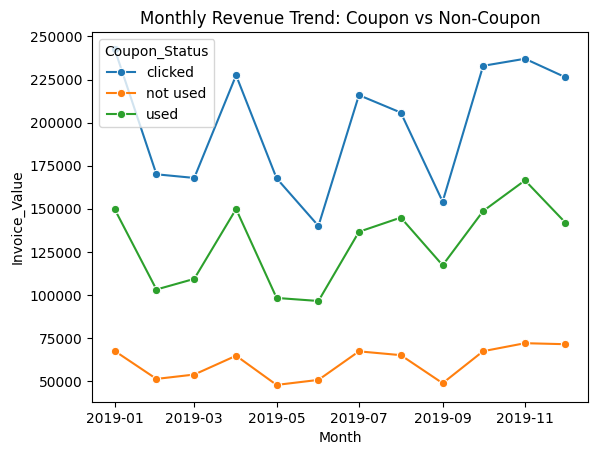

In [ ]:
# Step 5: Monthly Revenue Trend (Optional but Insightful)
# Check how coupon vs non-coupon revenues trend over time.
monthly_trend = (
    merged_df.groupby(['Month', 'Coupon_Status'])['Invoice_Value']
    .sum()
    .reset_index()
)

monthly_trend['Month'] = monthly_trend['Month'].dt.to_timestamp()

print(monthly_trend.dtypes)

monthly_trend['Invoice_Value'] = pd.to_numeric(monthly_trend['Invoice_Value'], errors='coerce')

print(monthly_trend.dtypes)
print(monthly_trend.head())

sns.lineplot(data=monthly_trend, x='Month', y='Invoice_Value', hue='Coupon_Status', marker='o')
plt.title("Monthly Revenue Trend: Coupon vs Non-Coupon")
plt.show()

# 7. Identify the top-performing products and analyze the factors driving their success. How can this insight inform inventory management and promotional strategies?

In [182]:
# Step 1: Define "Top-Performing Products"
# We can look at two main KPIs:
# Quantity Sold → indicates demand volume.
# Total Revenue → indicates profitability contribution.
# We’ll combine both to identify products that are not just popular (high sales) but also revenue drivers.

In [184]:
merged_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type'],
      dtype='object')

In [185]:
# Aggregate sales per product
product_perf = (
    merged_df.groupby(['Product_SKU', 'Product_Description', 'Product_Category'])
    .agg(
        Total_Quantity=('Quantity', 'sum'),
        Total_Revenue=('Invoice_Value', 'sum')
    )
    .reset_index()
)

# Rank products by revenue and quantity
product_perf['Revenue_Rank'] = product_perf['Total_Revenue'].rank(ascending=False, method='dense')
product_perf['Quantity_Rank'] = product_perf['Total_Quantity'].rank(ascending=False, method='dense')

# Top 10 products (by both revenue and quantity)
top_products = product_perf.sort_values(
    by=['Total_Revenue', 'Total_Quantity'], ascending=False
).head(10)

print(top_products)


        Product_SKU                                Product_Description  \
981  GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
983  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
976  GGOENEBB078899              Nest Cam Indoor Security Camera - USA   
984  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
985  GGOENEBQ079199      Nest Protect Smoke + CO White Wired Alarm-USA   
989  GGOENEBQ084699       Nest Learning Thermostat 3rd Gen-USA - White   
994  GGOENEBQ092299        Nest Secure Alarm System Starter Pack - USA   
990  GGOENEBQ086499                                  Nest Cam IQ - USA   
992  GGOENEBQ086799                            Nest Thermostat E - USA   
980  GGOENEBD084799      Nest Learning Thermostat 3rd Gen-USA - Copper   

    Product_Category  Total_Quantity  Total_Revenue  Revenue_Rank  \
981         Nest-USA            4570    633770.9521           1.0   
983         Nest-USA            5206    578973.

In [186]:
# Look at coupon impact for top products
top_with_coupon = (
    merged_df[merged_df['Product_SKU'].isin(top_products['Product_SKU'])]
    .groupby(['Product_SKU', 'Product_Description', 'Coupon_Status'])
    ['Invoice_Value'].sum()
    .reset_index()
    .sort_values(by='Invoice_Value', ascending=False)
)

print(top_with_coupon)


       Product_SKU                                Product_Description  \
6   GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
9   GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
0   GGOENEBB078899              Nest Cam Indoor Security Camera - USA   
8   GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
11  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
2   GGOENEBB078899              Nest Cam Indoor Security Camera - USA   
7   GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
12  GGOENEBQ079099    Nest Protect Smoke + CO White Battery Alarm-USA   
15  GGOENEBQ079199      Nest Protect Smoke + CO White Wired Alarm-USA   
18  GGOENEBQ084699       Nest Learning Thermostat 3rd Gen-USA - White   
10  GGOENEBQ078999             Nest Cam Outdoor Security Camera - USA   
1   GGOENEBB078899              Nest Cam Indoor Security Camera - USA   
27  GGOENEBQ092299        Nest Secure Alarm System 

In [188]:
# See which categories dominate among top products
category_perf = (
    top_products.groupby('Product_Category')
    .agg(
        Total_Quantity=('Total_Quantity', 'sum'),
        Total_Revenue=('Total_Revenue', 'sum')
    )
    .reset_index()
    .sort_values(by='Total_Revenue', ascending=False)
)

print(category_perf)


  Product_Category  Total_Quantity  Total_Revenue
1         Nest-USA           21371   2.346705e+06
0             Nest            2372   3.733776e+05


# 8. Analyze the relationship between monthly marketing spend and revenue. Are there any months where marketing efforts yielded disproportionately high or low returns? How can marketing strategies be adjusted to improve ROI?



In [190]:
merged_df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Year,Month,Day,GST,Coupon_Code,Discount_pct,Date,Offline_Spend,Online_Spend,Gender,Location,Tenure_Months,Invoice_Value,First_Month,Customer_Type,Marketing_Spend
0,17850,1/1/2019,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,used,2019,2019-01,1,0.10,ELEC10,10.0,2019-01-01,4500,2424.5,M,Chicago,12,158.6729,2019-01,New,6924.5
1,17850,1/1/2019,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,used,2019,2019-01,1,0.10,ELEC10,10.0,2019-01-01,4500,2424.5,M,Chicago,12,158.6729,2019-01,New,6924.5
2,17850,1/1/2019,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,used,2019,2019-01,1,0.10,OFF10,10.0,2019-01-01,4500,2424.5,M,Chicago,12,8.5295,2019-01,New,6924.5
3,17850,1/1/2019,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,not used,2019,2019-01,1,0.18,SALE10,10.0,2019-01-01,4500,2424.5,M,Chicago,12,99.5843,2019-01,New,6924.5
4,17850,1/1/2019,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,used,2019,2019-01,1,0.18,AIO10,10.0,2019-01-01,4500,2424.5,M,Chicago,12,24.0230,2019-01,New,6924.5


In [ ]:
# Calculate total marketing spend
merged_df['Marketing_Spend'] = merged_df['Offline_Spend'] + merged_df['Online_Spend']

# Group by month to calculate total revenue and marketing spend
monthly_marketing = (
    merged_df.groupby(['Year', 'Month'])
    .agg(
        Total_Revenue=('Invoice_Value', 'sum'),
        Total_Marketing_Spend=('Marketing_Spend', 'max')
    )
    .reset_index()
)

# If Month is a Period (e.g., Period('2019-01', 'M'))
monthly_marketing["YearMonth"] = monthly_marketing["Month"].dt.to_timestamp()


In [196]:
# ROI formula: (Revenue - Spend) * 100 / Spend
monthly_marketing['ROI_pct'] = (
    (monthly_marketing['Total_Revenue'] - monthly_marketing['Total_Marketing_Spend']) * 100
    / monthly_marketing['Total_Marketing_Spend']
)

print(monthly_marketing[['YearMonth', 'Total_Revenue', 'Total_Marketing_Spend', 'ROI_pct']].head())


   YearMonth  Total_Revenue  Total_Marketing_Spend      ROI_pct
0 2019-01-01   460087.03245                8555.30  5277.801275
1 2019-02-01   324330.66720                8349.02  3784.655531
2 2019-03-01   330923.97143                6066.29  5355.129435
3 2019-04-01   441974.38503                7078.84  6143.599022
4 2019-05-01   313637.96936                5697.60  5404.738300


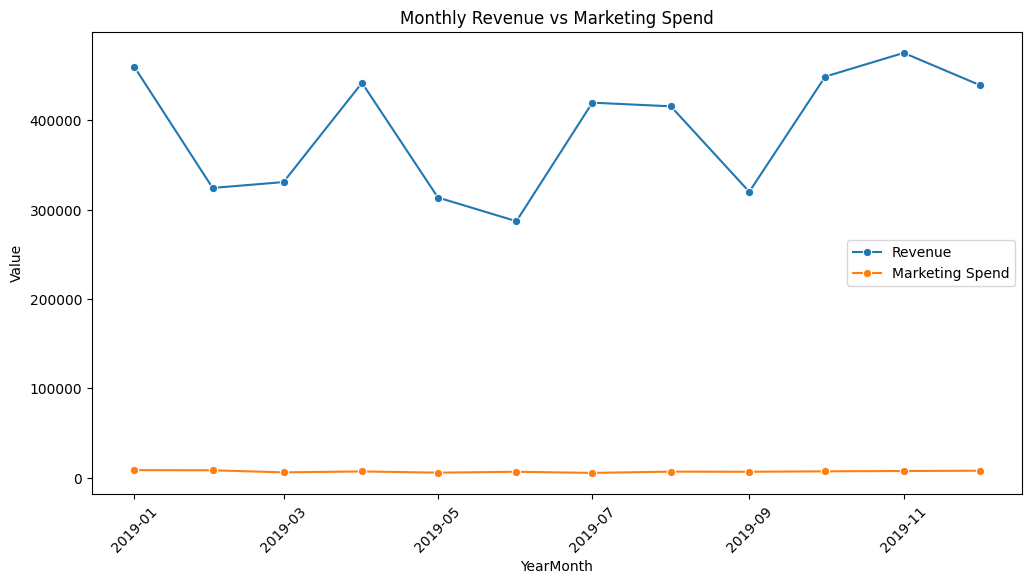

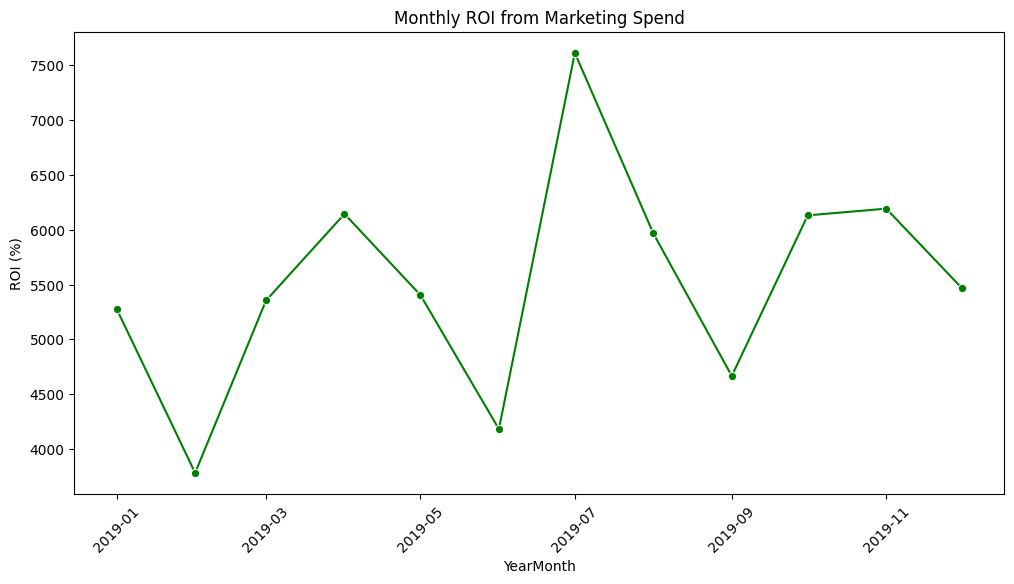

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot revenue vs spend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_marketing, x='YearMonth', y='Total_Revenue', label='Revenue', marker='o')
sns.lineplot(data=monthly_marketing, x='YearMonth', y='Total_Marketing_Spend', label='Marketing Spend', marker='o')
plt.title("Monthly Revenue vs Marketing Spend")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Plot ROI trend
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_marketing, x='YearMonth', y='ROI_pct', marker='o', color="green")
plt.title("Monthly ROI from Marketing Spend")
plt.ylabel("ROI (%)")
plt.xticks(rotation=45)
plt.show()


# 9. Evaluate the effectiveness of marketing campaigns by comparing marketing spend to revenue generated. Are there opportunities to reallocate resources for better results?



In [ ]:
# Step 1: Aggregate marketing spend and revenue
# From your schema, the relevant columns are:
# Marketing spend: Offline_Spend, Online_Spend
# Revenue generated: Invoice_Value
# You can aggregate at a monthly or campaign level using Year and Month (or any other campaign identifier if available).

import pandas as pd

# Aggregate marketing spend and revenue per month
monthly_data = merged_df.groupby(['Year', 'Month']).agg({
    'Offline_Spend': 'max',
    'Online_Spend': 'max',
    'Invoice_Value': 'sum'
}).reset_index()

# Total marketing spend
monthly_data['Total_Marketing_Spend'] = monthly_data['Offline_Spend'] + monthly_data['Online_Spend']

# Marketing efficiency (% of revenue)
monthly_data['Marketing_Spend_pct'] = monthly_data['Total_Marketing_Spend'] * 100 / monthly_data['Invoice_Value']

monthly_data


,Year,Month,Offline_Spend,Online_Spend,Invoice_Value,Total_Marketing_Spend,Marketing_Spend_pct
0,2019,2019-01,5000,4055.30,460087.03245,9055.30,1.968171
1,2019,2019-02,4000,4349.02,324330.66720,8349.02,2.574231
2,2019,2019-03,4000,2639.99,330923.97143,6639.99,2.006500
3,2019,2019-04,4000,4019.93,441974.38503,8019.93,1.814569
4,2019,2019-05,3000,3052.49,313637.96936,6052.49,1.929770
5,2019,2019-06,3500,3202.10,287125.25071,6702.10,2.334208
6,2019,2019-07,2500,3444.24,419784.20761,5944.24,1.416023
7,2019,2019-08,3500,3352.38,415699.17184,6852.38,1.648399
8,2019,2019-09,3000,3713.10,320048.22198,6713.10,2.097528
9,2019,2019-10,3500,3705.50,448939.11355,7205.50,1.605006


In [205]:
# Step 2: Interpret marketing efficiency
# High efficiency: Low marketing spend % → getting more revenue per marketing dollar.
# Low efficiency: High marketing spend % → revenue doesn’t justify spend.
# Example insight:
# If July had a marketing spend of ₹1,00,000 and revenue of ₹10,00,000, then spend % = 10%. If August had spend ₹1,50,000 but revenue only ₹12,00,000, then spend % = 12.5%. July is more efficient.

In [206]:
# Step 3: Identify trends and opportunities
# Compare spend % over months or campaigns to see patterns.
# Segment by channel (Offline_Spend vs Online_Spend) to find high ROI channels.
# Correlate with promotions (Coupon_Status, Discount_pct) to understand impact of discounts on efficiency.
# Allocate resources:
# Reduce spend in low-efficiency periods/channels.
# Increase spend in high-efficiency periods or campaigns.

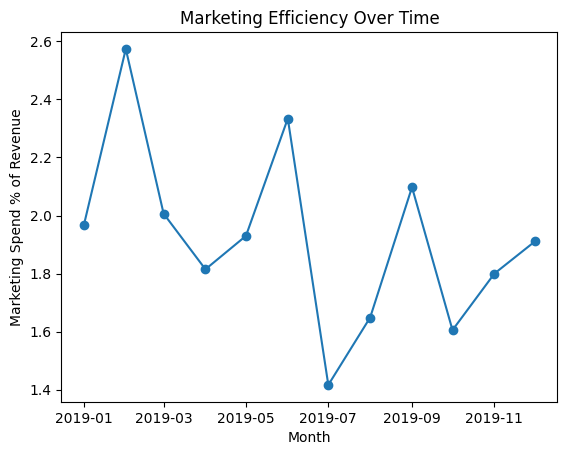

In [207]:
import matplotlib.pyplot as plt

monthly_data["Month"] = monthly_data["Month"].dt.to_timestamp()
plt.plot(monthly_data['Month'], monthly_data['Marketing_Spend_pct'], marker='o')
plt.title('Marketing Efficiency Over Time')
plt.xlabel('Month') 
plt.ylabel('Marketing Spend % of Revenue')
plt.show()


# 10. Segment customers into groups such as Premium, Gold, Silver, and Standard. What targeted strategies can be developed for each segment to improve retention and revenue? (Use RFM segmentation techniques)


In [208]:
# Step 1: Calculate RFM Metrics
# From your table:
# Recency (R): How recently a customer made a purchase → Transaction_Date
# Frequency (F): How often a customer purchases → count of Transaction_ID per CustomerID
# Monetary (M): How much a customer spends → sum of Invoice_Value per CustomerID

In [211]:
import pandas as pd

# Ensure Transaction_Date is datetime
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

# Define a reference date for recency calculation (e.g., latest transaction date)
reference_date = merged_df['Transaction_Date'].max() + pd.Timedelta(days=1)

# Aggregate RFM metrics per customer
rfm = merged_df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (reference_date - x.max()).days,  # Recency
    'Transaction_ID': 'nunique',                                   # Frequency
    'Invoice_Value': 'sum'                                         # Monetary
}).reset_index()

rfm.rename(columns={
    'Transaction_Date': 'Recency',
    'Transaction_ID': 'Frequency',
    'Invoice_Value': 'Monetary'
}, inplace=True)


In [212]:
# Step 2: Define RFM Segments
# A common approach is to score each RFM metric from 1 to 4 (quartiles) and then combine them.

In [215]:
# Assign quartile scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1], duplicates='drop')   # Lower recency = better
# rfm['F_Score'] = pd.qcut(rfm['Frequency'], 4, labels=[1,2,3,4], duplicates='drop') # Higher frequency = better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4], duplicates='drop')  # Higher monetary = better

# Combine scores for segmentation
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


In [216]:
# Step 3: Map RFM scores to Customer Segments
# Define segments like Premium, Gold, Silver, Standard:

def segment_customer(row):
    if int(row['R_Score']) >= 3 and int(row['F_Score']) >= 3 and int(row['M_Score']) >= 3:
        return 'Premium'
    elif int(row['R_Score']) >= 2 and int(row['F_Score']) >= 2 and int(row['M_Score']) >= 2:
        return 'Gold'
    elif int(row['R_Score']) >= 1 and int(row['F_Score']) >= 2:
        return 'Silver'
    else:
        return 'Standard'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)


In [ ]:
# Step 4: Insights and Targeted Strategies
# Segment:	Characteristics	Targeted Strategy
# Premium:	Recent, frequent, high spenders	Loyalty programs, VIP offers, early access to products
# Gold:	Recent/frequent with moderate spend	Personalized discounts, cross-sell campaigns
# Silver:	Occasional buyers	Incentivize frequent purchases, limited-time offers
# Standard:	Infrequent, low spend	Reactivation campaigns, newsletters, low-cost promotions 

In [218]:
# Step 5: Optional: Merge back to main dataset
merged_df = merged_df.merge(rfm[['CustomerID', 'Customer_Segment']], on='CustomerID', how='left')
print(merged_df.head(2))


  CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1      17850       1/1/2019       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year    Month  Day  \
0         1     153.71               6.5          used  2019  2019-01    1   
1         1     153.71               6.5          used  2019  2019-01    1   

   GST Coupon_Code  Discount_pct       Date  Offline_Spend  Online_Spend  \
0  0.1      ELEC10          10.0 2019-01-01           4500        2424.5   
1  0.1      ELEC10          10.0 2019-01-01           4500        2424.5   

  Gender Location  Tenure_Months  Invoice_Value First_Month Customer_Type  \
0      M  Chicago             12       158.672

# 11. Analyze the revenue contribution of each customer segment. How can the company focus its efforts on high-value segments while nurturing lower-value segments?


In [220]:
merged_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment'],
      dtype='object')

In [221]:
# Step 1: Aggregate revenue by segment

import pandas as pd

# Total revenue and number of customers per segment
segment_revenue = merged_df.groupby('Customer_Segment').agg(
    Total_Revenue=('Invoice_Value', 'sum'),
    Avg_Revenue_per_Customer=('Invoice_Value', 'mean'),
    Customer_Count=('CustomerID', 'nunique')
).reset_index()

# Calculate % contribution of each segment
total_revenue = segment_revenue['Total_Revenue'].sum()
segment_revenue['Revenue_Pct'] = segment_revenue['Total_Revenue'] * 100 / total_revenue

segment_revenue.sort_values(by='Total_Revenue', ascending=False, inplace=True)
segment_revenue


,Customer_Segment,Total_Revenue,Avg_Revenue_per_Customer,Customer_Count,Revenue_Pct
1,Premium,2.521115e+06,94.117110,355,53.898054
0,Gold,9.352173e+05,79.235561,346,19.993691
2,Silver,7.105071e+05,88.846704,400,15.189688
3,Standard,5.107228e+05,86.023714,367,10.918568


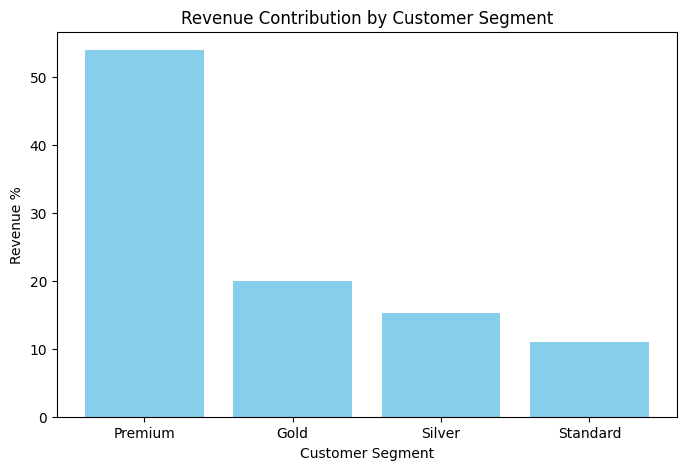

In [222]:
# Step 2: Visualize revenue contribution

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(segment_revenue['Customer_Segment'], segment_revenue['Revenue_Pct'], color='skyblue')
plt.title('Revenue Contribution by Customer Segment')
plt.ylabel('Revenue %')
plt.xlabel('Customer Segment')
plt.show()


In [ ]:
# Step 3: Strategic Insights
# Segment :	Revenue Contribution :	Strategy
# Premium :	High (e.g., 50%) :	Focus retention: loyalty programs, VIP perks, exclusive offers, personalized engagement
# Gold :	Moderate :	Encourage upselling and cross-selling; targeted discounts for repeat purchases
# Silver :	Low-Moderate :	Incentivize more frequent purchases; targeted promotions and product recommendations
# Standard :	Low :	Reactivation campaigns, newsletters, low-cost promotions, trial offers

# Key Points:
# Prioritize high-value segments (Premium & Gold): Ensure they remain loyal; small improvements here can have large revenue impact.
# Nurture lower-value segments (Silver & Standard): Use cost-effective campaigns to increase purchase frequency and average spend.
# Marketing Spend Alignment: Compare Marketing_Spend vs revenue per segment to optimize budget allocation.

# 12. Group customers by their month of first purchase and analyze retention rates over time. Which cohorts exhibit the highest and lowest retention rates? What strategies can be implemented to improve retention for weaker cohorts?


In [223]:
print(merged_df.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment'],
      dtype='object')


In [ ]:
# Step 1: Prepare cohort data
# Convert Transaction_Date and First_Month to datetime/month format.
# Compute cohort index (months since first purchase for each customer).

import pandas as pd

# Ensure Transaction_Date is datetime
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])
# Convert First_Month to datetime (assuming format 'YYYY-MM')
merged_df['First_Month'] = merged_df['First_Month'].dt.to_timestamp() 

# Extract transaction month
merged_df['Transaction_Month'] = merged_df['Transaction_Date'].dt.to_period('M')

# Extract cohort month (first purchase month)
merged_df['Cohort_Month'] = merged_df['First_Month'].dt.to_period('M')

# Calculate cohort index: months since first purchase
def get_month_diff(row):
    return (row['Transaction_Month'].year - row['Cohort_Month'].year) * 12 + \
           (row['Transaction_Month'].month - row['Cohort_Month'].month)

merged_df['Cohort_Index'] = merged_df.apply(get_month_diff, axis=1)
print(merged_df.head(3))

  CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1      17850       1/1/2019       2019-01-01  GGOENEBJ079499   
2      17850       1/1/2019       2019-01-01  GGOEGFKQ020399   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
2              Google Laptop and Cell Phone Stickers           Office   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year    Month  Day  \
0         1     153.71               6.5          used  2019  2019-01    1   
1         1     153.71               6.5          used  2019  2019-01    1   
2         1       2.05               6.5          used  2019  2019-01    1   

   GST Coupon_Code  Discount_pct       Date  Offline_Spend  Online_Spend  \
0  0.1      ELEC10          10.0 2019-01-01           4500   

In [230]:
# Step 2: Calculate retention rates
# Count unique customers per cohort per month.
# Divide by cohort size (number of customers in that cohort).

# Count unique customers per cohort per month
cohort_data = merged_df.groupby(['Cohort_Month', 'Cohort_Index'])['CustomerID'].nunique().reset_index()
print("*"*40)
print(cohort_data.head(2))
# Get cohort size (number of customers in first month)
cohort_size = cohort_data[cohort_data['Cohort_Index'] == 0][['Cohort_Month','CustomerID']]
cohort_size.rename(columns={'CustomerID':'Cohort_Size'}, inplace=True)
print("*"*40)
print(cohort_size.head(2))

# Merge cohort size
cohort_data = cohort_data.merge(cohort_size, on='Cohort_Month')
print("*"*40)
print(cohort_data.head(2))

# Calculate retention rate
cohort_data['Retention_Rate'] = cohort_data['CustomerID'] / cohort_data['Cohort_Size']
print("*"*40)
print(cohort_data.head(2))

****************************************
  Cohort_Month  Cohort_Index  CustomerID
0      2019-01             0         215
1      2019-01             1          13
****************************************
   Cohort_Month  Cohort_Size
0       2019-01          215
12      2019-02           96
****************************************
  Cohort_Month  Cohort_Index  CustomerID  Cohort_Size
0      2019-01             0         215          215
1      2019-01             1          13          215
****************************************
  Cohort_Month  Cohort_Index  CustomerID  Cohort_Size  Retention_Rate
0      2019-01             0         215          215        1.000000
1      2019-01             1          13          215        0.060465


In [227]:
# Step 3: Pivot for visualization

# Pivot table: rows = Cohort_Month, columns = Cohort_Index, values = Retention_Rate
cohort_pivot = cohort_data.pivot(index='Cohort_Month', columns='Cohort_Index', values='Retention_Rate')

# Optional: format as %
cohort_pivot = cohort_pivot.round(3) * 100
cohort_pivot

Cohort_Index,0,1,2,3,4,5,6,7,8,9,10,11
Cohort_Month,,,,,,,,,,,,
2019-01,100.0,6.0,11.2,15.8,10.7,20.5,16.3,21.9,10.7,13.0,9.3,15.8
2019-02,100.0,7.3,9.4,16.7,17.7,22.9,19.8,15.6,12.5,11.5,16.7,NaN
2019-03,100.0,10.2,19.8,14.1,18.1,18.6,12.4,12.4,8.5,10.7,NaN,NaN
2019-04,100.0,8.6,14.7,14.7,11.0,9.2,6.1,9.8,7.4,NaN,NaN,NaN
2019-05,100.0,10.7,8.0,11.6,8.9,11.6,12.5,7.1,NaN,NaN,NaN,NaN
2019-06,100.0,14.6,16.1,8.8,8.0,10.2,8.0,NaN,NaN,NaN,NaN,NaN
2019-07,100.0,13.8,4.3,6.4,11.7,9.6,NaN,NaN,NaN,NaN,NaN,NaN
2019-08,100.0,10.4,11.1,7.4,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09,100.0,7.7,3.8,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


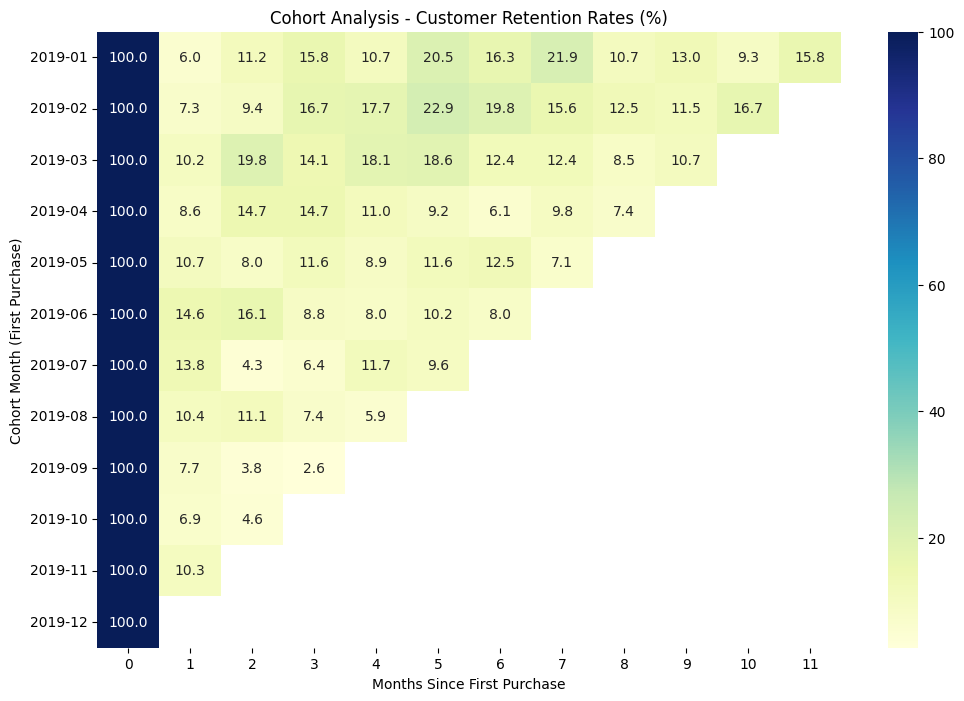

In [228]:
# Step 4: Visualize retention trends
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(cohort_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Cohort Analysis - Customer Retention Rates (%)')
plt.ylabel('Cohort Month (First Purchase)')
plt.xlabel('Months Since First Purchase')
plt.show()

In [ ]:
# Step 5: Insights and strategies
# Observation	Strategy
# Cohorts with highest retention :	Focus marketing on these loyal cohorts, upsell/cross-sell products
# Cohorts with lowest retention :	Identify pain points: inactive follow-up, weak engagement, pricing
# Early months with drop-off :	Send welcome emails, personalized discounts, loyalty incentives
# Later months with plateau :	Use re-engagement campaigns: targeted offers or exclusive deals

# 13. Analyze the lifetime value of customers acquired in different months. How can this insight inform acquisition and retention strategies?


In [236]:
print(merged_df.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment',
       'Transaction_Month', 'Cohort_Month', 'Cohort_Index'],
      dtype='object')


In [237]:
# Step 1: Define Lifetime Value per Customer
# A simple method: sum of all Invoice_Value for a customer. This gives their total revenue contribution so far.
    
import pandas as pd

# Calculate lifetime value per customer
customer_ltv = merged_df.groupby('CustomerID').agg(
    Lifetime_Value=('Invoice_Value', 'sum'),
    First_Month=('First_Month', 'first')  # Keep cohort info
).reset_index()

In [238]:
# Step 2: Aggregate LTV by cohort (month of acquisition)
# Aggregate by First_Month (cohort)
cohort_ltv = customer_ltv.groupby('First_Month').agg(
    Avg_Lifetime_Value=('Lifetime_Value', 'mean'),
    Total_Lifetime_Value=('Lifetime_Value', 'sum'),
    Customer_Count=('CustomerID', 'nunique')
).reset_index()

# Optional: revenue per customer for comparison
cohort_ltv['Revenue_per_Customer'] = cohort_ltv['Total_Lifetime_Value'] / cohort_ltv['Customer_Count']

cohort_ltv.sort_values(by='First_Month', inplace=True)
cohort_ltv

,First_Month,Avg_Lifetime_Value,Total_Lifetime_Value,Customer_Count,Revenue_per_Customer
0,2019-01-01,5099.799030,1.096457e+06,215,5099.799030
1,2019-02-01,5687.903318,5.460387e+05,96,5687.903318
2,2019-03-01,3640.827969,6.444266e+05,177,3640.827969
3,2019-04-01,2879.151335,4.693017e+05,163,2879.151335
4,2019-05-01,2999.140049,3.359037e+05,112,2999.140049
5,2019-06-01,1975.386564,2.706280e+05,137,1975.386564
6,2019-07-01,2651.881155,2.492768e+05,94,2651.881155
7,2019-08-01,1932.679013,2.609117e+05,135,1932.679013
8,2019-09-01,1749.188523,1.364367e+05,78,1749.188523
9,2019-10-01,2895.034452,2.518680e+05,87,2895.034452


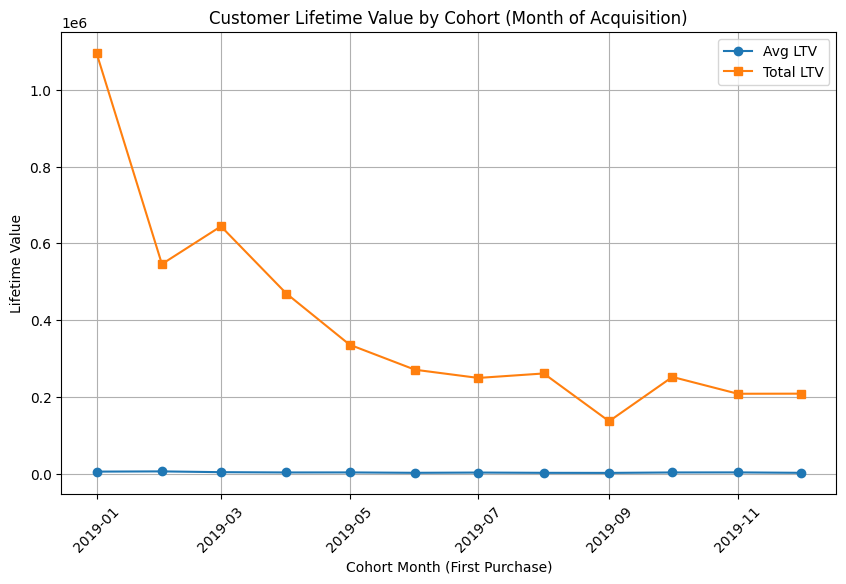

In [239]:
# Step 3: Visualize LTV by cohort
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(cohort_ltv['First_Month'], cohort_ltv['Avg_Lifetime_Value'], marker='o', label='Avg LTV')
plt.plot(cohort_ltv['First_Month'], cohort_ltv['Total_Lifetime_Value'], marker='s', label='Total LTV')
plt.title('Customer Lifetime Value by Cohort (Month of Acquisition)')
plt.xlabel('Cohort Month (First Purchase)')
plt.ylabel('Lifetime Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Step 4: Insights and Strategies
# Observation	Strategy
# Cohorts with highest Avg LTV :	Focus acquisition budget on similar channels/segments; retain them with VIP programs or loyalty incentives
# Cohorts with lower Avg LTV :	Improve engagement through personalized offers, reactivation campaigns, or onboarding support
# Cohorts with high total LTV :	Shows both volume and value—ensure continued retention efforts for these cohorts
# Cohorts with low total LTV :	Reassess acquisition channels; focus on cost-effective campaigns and nurturing strategies

# 14. Do customers who use coupons have a different average transaction value compared to those who do not? Conduct a statistical test to validate this hypothesis. What implications does this have for the company's discount and coupon strategies?


In [244]:
print(merged_df['Coupon_Status'].unique())
print("*"*40)
print(merged_df.head(2))

['used' 'not used' 'clicked']
****************************************
  CustomerID Transaction_ID Transaction_Date     Product_SKU  \
0      17850       1/1/2019       2019-01-01  GGOENEBJ079499   
1      17850       1/1/2019       2019-01-01  GGOENEBJ079499   

                                 Product_Description Product_Category  \
0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   

   Quantity  Avg_Price  Delivery_Charges Coupon_Status  Year    Month  Day  \
0         1     153.71               6.5          used  2019  2019-01    1   
1         1     153.71               6.5          used  2019  2019-01    1   

   GST Coupon_Code  Discount_pct       Date  Offline_Spend  Online_Spend  \
0  0.1      ELEC10          10.0 2019-01-01           4500        2424.5   
1  0.1      ELEC10          10.0 2019-01-01           4500        2424.5   

  Gender Location  Tenure_Months  Invoice_Value Firs

In [245]:
# Step 1: Define the groups
# From your schema, relevant columns are:
# Coupon_Status (assume values like "Used" / "Not Used" or 1/0)
# Invoice_Value (transaction value)

import pandas as pd

# Split data into two groups
coupon_used = merged_df[merged_df['Coupon_Status'] == 'used']['Invoice_Value']
coupon_not_used = merged_df[merged_df['Coupon_Status'] == 'not used']['Invoice_Value']

# Check basic statistics
print("Average Invoice Value with Coupon: ", coupon_used.mean())
print("Average Invoice Value without Coupon: ", coupon_not_used.mean())

Average Invoice Value with Coupon:  87.8859857768028
Average Invoice Value without Coupon:  90.60022738724146


In [246]:
# Step 2: Formulate hypotheses
# Null hypothesis (H0): Customers who use coupons have the same average transaction value as those who do not.
# Alternative hypothesis (H1): Customers who use coupons have a different average transaction value than those who do not.
# This is a two-sample comparison.


In [247]:
# Step 3: Choose a statistical test
# Since we are comparing means of two independent groups, a two-sample t-test is appropriate.

In [249]:
print(coupon_used.head(2)) 
print("*"*40) 
print(coupon_not_used.head(2))

0    158.6729
1    158.6729
Name: Invoice_Value, dtype: float64
****************************************
3    99.5843
6    55.5644
Name: Invoice_Value, dtype: float64


In [250]:
# Step 1: Check for NaNs and empty groups
# Check number of transactions per group
print("Coupon used count:", coupon_used.shape[0])
print("Coupon not used count:", coupon_not_used.shape[0])

# Remove NaNs
coupon_used = coupon_used.dropna()
coupon_not_used = coupon_not_used.dropna()

Coupon used count: 17904
Coupon not used count: 8094


In [251]:
# Step 2: Ensure each group has enough data
if len(coupon_used) < 2 or len(coupon_not_used) < 2:
    print("Error: One of the groups does not have enough data for t-test.") 

In [252]:
# Step 4: Conduct the t-test
from scipy import stats

# Two-sample t-test
t_stat, p_value = stats.ttest_ind(coupon_used, coupon_not_used, equal_var=False)  # Welch's t-test

print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in average transaction value.")
else:
    print("Fail to reject null hypothesis: No significant difference in average transaction value.")

t-statistic: -1.2710477108356333
p-value: 0.2037311390989995
Fail to reject null hypothesis: No significant difference in average transaction value.


In [ ]:
# Step 5: Implications for discount/coupon strategies
# Result	Implication
# Coupon users spend more on average	Coupons are effective at increasing basket size → continue targeted promotions
# Coupon users spend less on average	Coupons attract price-sensitive customers → consider balancing discount strategy with profitability
# No significant difference	Coupons may not affect spending behavior → focus on customer acquisition or retention goals rather than revenue lift

# 15. Do purchase behaviors (e.g., order frequency, order value) vary significantly across different demographic groups or pricing factors (e.g., delivery charges)? Test for differences in purchase behavior across locations, age groups, or delivery charge tiers. How can these insights inform personalized marketing and pricing strategies?


In [253]:
print(merged_df.columns)

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment',
       'Transaction_Month', 'Cohort_Month', 'Cohort_Index'],
      dtype='object')


In [254]:
# Step 1: Define the hypotheses
# Let’s pick Invoice_Value (or Avg_Price) and Order Frequency (number of transactions) as purchase behavior metrics.

# For example:
# By Location:
# Null Hypothesis (H0): Average Invoice_Value does not differ across locations.
# Alternative Hypothesis (H1): Average Invoice_Value differs across locations.

# By Age/Tenure Group:
# You can bin Tenure_Months into groups (e.g., 0–12, 13–36, 37+ months).
# H0: Average Invoice_Value is same across tenure groups.
# H1: At least one tenure group has a different Invoice_Value.

# By Delivery Charges Tier:
# Define bins for Delivery_Charges (e.g., 0–50, 51–100, >100).
# H0: Average Invoice_Value is same across delivery charge tiers.
# H1: At least one tier differs.

In [260]:
# Step 2: Choose statistical tests
# Comparing two groups: t-test (e.g., male vs female)
# Comparing more than two groups: One-way ANOVA
# Non-normal distributions: Kruskal–Wallis test (non-parametric alternative)
# Since we may have multiple groups (locations, delivery charge tiers, tenure bins), ANOVA is suitable.
# Example: Comparing Invoice_Value across Location:

from scipy.stats import f_oneway

# Remove NaNs from each group
groups = merged_df.groupby('Location')['Invoice_Value'].apply(lambda x: x.dropna().tolist())

f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")
if p_val < 0.05:
    print("Significant differences exist across locations.")
else:
    print("No significant difference across locations.")


F-statistic: 2.8333270265875483, p-value: 0.023072634106333548
Significant differences exist across locations.


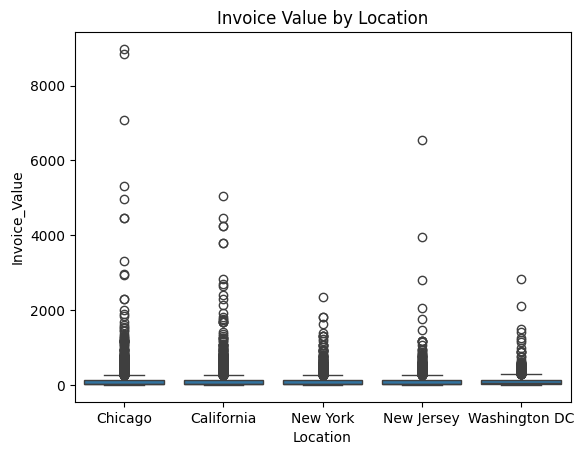

In [262]:
# Step 4: Visualize differences
# Boxplots or violin plots help see distribution differences:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Location', y='Invoice_Value', data=merged_df)
plt.title("Invoice Value by Location")
plt.show()

In [263]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# -----------------------------
# 1️⃣ Compute purchase behavior metrics
# -----------------------------
# Order frequency per customer
order_freq = merged_df.groupby('CustomerID')['Transaction_ID'].nunique().reset_index()
order_freq.rename(columns={'Transaction_ID': 'Order_Frequency'}, inplace=True)

# Average order value per customer
avg_order_value = merged_df.groupby('CustomerID')['Invoice_Value'].mean().reset_index()
avg_order_value.rename(columns={'Invoice_Value': 'Avg_Order_Value'}, inplace=True)

# Merge metrics
customer_metrics = order_freq.merge(avg_order_value, on='CustomerID')

# Add demographic and pricing info (take first occurrence for each customer)
customer_info = merged_df.groupby('CustomerID').agg({
    'Gender': 'first',
    'Location': 'first',
    'Delivery_Charges': 'mean',   # average delivery charges per customer
    'Customer_Segment': 'first'
}).reset_index()

customer_metrics = customer_metrics.merge(customer_info, on='CustomerID')

# -----------------------------
# 2️⃣ Bin continuous variables
# -----------------------------
# Delivery charges bins: Low / Medium / High
customer_metrics['Delivery_Charges_Bin'] = pd.qcut(
    customer_metrics['Delivery_Charges'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

# -----------------------------
# 3️⃣ Define groups to test
# -----------------------------
test_groups = {
    'Gender': {'type': '2group', 'column': 'Gender'},
    'Location': {'type': 'multigroup', 'column': 'Location'},
    'Delivery_Charges_Bin': {'type': 'multigroup', 'column': 'Delivery_Charges_Bin'}
}

metrics_to_test = ['Order_Frequency', 'Avg_Order_Value']

# -----------------------------
# 4️⃣ Perform statistical tests
# -----------------------------
results = []

for metric in metrics_to_test:
    for group_name, group_info in test_groups.items():
        data = customer_metrics[[metric, group_info['column']]].dropna()
        groups = [g[metric].values for _, g in data.groupby(group_info['column'])]

        if group_info['type'] == '2group':
            # t-test
            t_stat, p_val = stats.ttest_ind(*groups)
            test_used = 'T-test'
        else:
            # ANOVA
            f_stat, p_val = stats.f_oneway(*groups)
            test_used = 'ANOVA'

        results.append({
            'Metric': metric,
            'Group': group_name,
            'Test': test_used,
            'p-value': p_val,
            'Significant': 'Yes' if p_val < 0.05 else 'No'
        })

results_df = pd.DataFrame(results)

# -----------------------------
# 5️⃣ Display results
# -----------------------------
print(results_df)


            Metric                 Group    Test       p-value Significant
0  Order_Frequency                Gender  T-test  9.624098e-01          No
1  Order_Frequency              Location   ANOVA  3.262326e-01          No
2  Order_Frequency  Delivery_Charges_Bin   ANOVA  6.374610e-14         Yes
3  Avg_Order_Value                Gender  T-test  8.326897e-01          No
4  Avg_Order_Value              Location   ANOVA  1.505213e-01          No
5  Avg_Order_Value  Delivery_Charges_Bin   ANOVA  2.847945e-14         Yes


/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/4039848286.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g[metric].values for _, g in data.groupby(group_info['column'])]
/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/4039848286.py:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g[metric].values for _, g in data.groupby(group_info['column'])]


# 16. Does customer tenure impact purchase frequency? Analyze the relationship between customer tenure and purchase frequency. How can this insight be used to improve customer engagement and retention strategies?


In [266]:
print(merged_df.columns )

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment',
       'Transaction_Month', 'Cohort_Month', 'Cohort_Index'],
      dtype='object')


In [ ]:
# 1️⃣ Define Key Variables

# Customer Tenure → Tenure_Months (how long a customer has been active).
# Purchase Frequency → number of transactions per customer (Transaction_ID count).
# Raw frequency will be naturally higher for long-tenure customers just because they’ve been around longer. To make a fair comparison, we should normalize by tenure.
# Normalized Purchase Frequency = Total Orders ÷ Tenure (months)
# This gives a measure of average orders per month.

In [ ]:
# 2️⃣ Hypotheses
# H0 (Null): Customer tenure does not impact normalized purchase frequency.
# H1 (Alternative): Customer tenure impacts normalized purchase frequency (long-tenure customers buy more/less frequently).

In [ ]:
# 3️⃣ Grouping Customers
# You can either:
# Use continuous correlation (e.g., Spearman correlation between Tenure_Months and normalized frequency).
# Or categorize tenure (e.g., Short = 0–12 months, Medium = 13–24 months, Long = 25+ months) and run a statistical test across groups.

In [ ]:
# 4️⃣ Suitable Statistical Tests
# Continuous correlation:
# Pearson correlation (if data is normally distributed).
# Spearman rank correlation (non-parametric).
# Group comparison (Short/Medium/Long tenure):
# ANOVA (if ≥3 groups, parametric).
# Kruskal-Wallis test (if ≥3 groups, non-parametric).
# t-test (if just comparing 2 tenure groups).

In [268]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Step 1: Compute purchase frequency per customer
customer_orders = merged_df.groupby('CustomerID')['Transaction_ID'].nunique().reset_index()
customer_orders.rename(columns={'Transaction_ID': 'Total_Orders'}, inplace=True)

# Step 2: Merge with tenure info
customer_tenure = merged_df[['CustomerID', 'Tenure_Months']].drop_duplicates()
df = customer_orders.merge(customer_tenure, on='CustomerID')

# Step 3: Normalize frequency (orders per month of tenure)
df['Orders_per_Month'] = df['Total_Orders'] / df['Tenure_Months']

# Step 4a: Correlation between tenure and normalized purchase frequency
corr, p_val = stats.spearmanr(df['Tenure_Months'], df['Orders_per_Month'])
print("Spearman correlation:", corr, "p-value:", p_val)

# Step 4b: Optional - Categorize tenure into bins
df['Tenure_Group'] = pd.cut(df['Tenure_Months'], bins=[0,12,24,60,120], 
                            labels=['Short (≤12)', 'Medium (13-24)', 'Long (25-60)', 'Very Long (60+)'])

# ANOVA across tenure groups
# groups = [g['Orders_per_Month'].values for _, g in df.groupby('Tenure_Group')]
groups = [g['Orders_per_Month'].values for _, g in df.groupby('Tenure_Group') if len(g) > 1]
f_stat, p_val_anova = stats.f_oneway(*groups)
print("ANOVA p-value:", p_val_anova) 

Spearman correlation: -0.731278774851329 p-value: 7.174937771178358e-246
ANOVA p-value: 8.628901115858351e-123


/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/1359021547.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [g['Orders_per_Month'].values for _, g in df.groupby('Tenure_Group') if len(g) > 1]


In [ ]:
# 6️⃣ Insights for Engagement & Retention
# If normalized frequency decreases with tenure → customers lose interest over time. Strategy: reactivation campaigns, personalized nudges, “win-back” offers for long-tenure but less-active customers.

# 17. Analyze the relationship between delivery charges and order behavior. Are there opportunities to optimize delivery pricing to increase order quantities or revenue?
Hint: Examine if delivery charges influence the quantity of items ordered.
Hint: A statistical test could determine if there's a significant effect of delivery charges on order quantity.

In [272]:
merged_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment',
       'Transaction_Month', 'Cohort_Month', 'Cohort_Index'],
      dtype='object')

In [273]:
# 1️⃣ Define Variables
# Independent variable (X): Delivery_Charges (continuous, or you can bin into low/medium/high).
# Dependent variables (Y):
# Quantity (items per order)
# Invoice_Value (total order revenue)

In [274]:
# 2️⃣ Hypotheses
# H0 (Null): Delivery charges have no impact on order quantity/revenue.
# H1 (Alternative): Delivery charges significantly impact order quantity/revenue.

In [275]:
# 3️⃣ Suitable Statistical Approaches
# Correlation Analysis:
# Spearman (non-parametric) to check monotonic relationship.
# Pearson if normally distributed.
# Group Comparison:
# Bin Delivery_Charges into categories (Low, Medium, High).
# Use ANOVA (if ≥3 bins and normally distributed) or Kruskal-Wallis (non-parametric).
# Regression (optional advanced):
# Model Quantity ~ Delivery_Charges to check direction and strength of relationship.

In [276]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# Step 1: Clean relevant columns
df = merged_df[['Quantity', 'Invoice_Value', 'Delivery_Charges']].dropna()

# Step 2: Correlation (Spearman, safer for skewed data)
corr_qty, p_qty = stats.spearmanr(df['Delivery_Charges'], df['Quantity'])
corr_val, p_val = stats.spearmanr(df['Delivery_Charges'], df['Invoice_Value'])

print("Spearman correlation (Delivery Charges vs Quantity):", corr_qty, "p-value:", p_qty)
print("Spearman correlation (Delivery Charges vs Invoice Value):", corr_val, "p-value:", p_val)

# Step 3: Create bins for Delivery Charges
df['Delivery_Bin'] = pd.qcut(df['Delivery_Charges'], q=3, labels=['Low', 'Medium', 'High'])

# Step 4: ANOVA / Kruskal-Wallis test for Quantity across bins
groups_qty = [g['Quantity'].values for _, g in df.groupby('Delivery_Bin') if len(g) > 1]

if len(groups_qty) > 1:
    try:
        f_stat, p_anova_qty = stats.f_oneway(*groups_qty)
        print("ANOVA p-value (Quantity across bins):", p_anova_qty)
    except Exception:
        h_stat, p_kw_qty = stats.kruskal(*groups_qty)
        print("Kruskal-Wallis p-value (Quantity across bins):", p_kw_qty)

# Step 5: ANOVA / Kruskal-Wallis test for Invoice_Value across bins
groups_val = [g['Invoice_Value'].values for _, g in df.groupby('Delivery_Bin') if len(g) > 1]

if len(groups_val) > 1:
    try:
        f_stat, p_anova_val = stats.f_oneway(*groups_val)
        print("ANOVA p-value (Invoice Value across bins):", p_anova_val)
    except Exception:
        h_stat, p_kw_val = stats.kruskal(*groups_val)
        print("Kruskal-Wallis p-value (Invoice Value across bins):", p_kw_val)


Spearman correlation (Delivery Charges vs Quantity): 0.2426735277476563 p-value: 0.0
Spearman correlation (Delivery Charges vs Invoice Value): 0.24612326293492212 p-value: 0.0
ANOVA p-value (Quantity across bins): 7.590386994042681e-226
ANOVA p-value (Invoice Value across bins): 8.545243955696977e-107


/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/561407628.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_qty = [g['Quantity'].values for _, g in df.groupby('Delivery_Bin') if len(g) > 1]
/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/561407628.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups_val = [g['Invoice_Value'].values for _, g in df.groupby('Delivery_Bin') if len(g) > 1]


In [ ]:
# 5️⃣ Interpretation for Business
# Positive correlation: If higher delivery charges are linked with higher spend (maybe premium customers or bulk orders), delivery pricing may not deter purchase.

# 18. Evaluate how taxes and delivery charges influence customer spending behavior. Are there opportunities to adjust pricing strategies to improve customer satisfaction and revenue?

In [277]:
merged_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment',
       'Transaction_Month', 'Cohort_Month', 'Cohort_Index'],
      dtype='object')

In [278]:
# 🔹 Step 1: Define Metrics
# We want to see how GST and Delivery_Charges influence Invoice_Value (spend per transaction).
# We can also check whether customer groups respond differently to these charges.
# Dependent variable → Invoice_Value
# Independent variables → Delivery_Charges (categorical/tiers), GST (continuous/tiers)

In [294]:
merged_df['Delivery_Charges'].min(), merged_df['Delivery_Charges'].max()

(np.float64(0.0), np.float64(521.36))

In [297]:
# 🔹 Step 2: Create Delivery Charge & Tax Buckets
# To make the analysis more interpretable, we can bucketize delivery charges and taxes.
import pandas as pd
import numpy as np

# Create delivery charge buckets
bins = [0, 20, 50, 100, np.inf]
labels = ['Low (0-20)', 'Medium (21-50)', 'High (51-100)', 'Very High (100+)']
merged_df['Delivery_Charge_Tier'] = pd.cut(merged_df['Delivery_Charges'], bins=bins, labels=labels)

# Create tax buckets (GST % relative to invoice value)
merged_df['GST_pct'] = merged_df['GST'] * 100
gst_bins = [0, 5, 12, 18] 
gst_labels = ['0-5%', '6-12%', '13-18%']
merged_df['GST_Tier'] = pd.cut(merged_df['GST_pct'], bins=gst_bins, labels=gst_labels)

In [298]:
# 🔹 Step 3: Exploratory Analysis
# Group averages by tiers to see spending patterns.
summary = merged_df.groupby(['Delivery_Charge_Tier', 'GST_Tier'])['Invoice_Value'].agg(['mean', 'median', 'count']).reset_index()
summary

# This gives insights like:
# Do customers with higher delivery charges spend less overall?
# Is higher GST bracket associated with lower invoice values?

/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/963098065.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = merged_df.groupby(['Delivery_Charge_Tier', 'GST_Tier'])['Invoice_Value'].agg(['mean', 'median', 'count']).reset_index()


,Delivery_Charge_Tier,GST_Tier,mean,median,count
0,Low (0-20),0-5%,149.359217,89.16000,3752
1,Low (0-20),6-12%,129.044215,121.23000,20187
2,Low (0-20),13-18%,39.208386,22.03856,25119
3,Medium (21-50),0-5%,146.470439,96.38960,142
4,Medium (21-50),6-12%,113.631137,70.97250,710
5,Medium (21-50),13-18%,97.748187,61.77280,1283
6,High (51-100),0-5%,236.780775,187.79375,61
7,High (51-100),6-12%,200.636590,133.83075,234
8,High (51-100),13-18%,156.051962,104.61868,522
9,Very High (100+),0-5%,531.323202,446.29650,31


In [299]:
# 🔹 Step 4: Statistical Tests
# To validate whether differences are statistically significant:
# (a) One-way ANOVA for Delivery Charges
from scipy.stats import f_oneway

groups = [group["Invoice_Value"].dropna() for name, group in merged_df.groupby("Delivery_Charge_Tier")]
anova_delivery = f_oneway(*groups)
print("ANOVA Delivery Charges:", anova_delivery)

ANOVA Delivery Charges: F_onewayResult(statistic=np.float64(609.3494378152839), pvalue=np.float64(0.0))


/var/folders/vn/c3mqdq6x3ls68052rdgkjsmm0000gn/T/ipykernel_14669/935621104.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group["Invoice_Value"].dropna() for name, group in merged_df.groupby("Delivery_Charge_Tier")]


In [300]:
# (b) Two-way ANOVA for Interaction (GST + Delivery Charges)
# Using statsmodels:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Invoice_Value ~ C(Delivery_Charge_Tier) + C(GST_Tier) + C(Delivery_Charge_Tier):C(GST_Tier)', data=merged_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# This will tell:
# Main effect of Delivery Charges
# Main effect of GST
# Interaction effect (GST * Delivery Charges)

                                           sum_sq       df            F  \
C(Delivery_Charge_Tier)              4.505827e+07      3.0   735.602979   
C(GST_Tier)                          1.058914e+08      2.0  2593.108948   
C(Delivery_Charge_Tier):C(GST_Tier)  3.135358e+06      6.0    25.593291   
Residual                             1.068874e+09  52350.0          NaN   

                                           PR(>F)  
C(Delivery_Charge_Tier)              0.000000e+00  
C(GST_Tier)                          0.000000e+00  
C(Delivery_Charge_Tier):C(GST_Tier)  1.520606e-30  
Residual                                      NaN  


In [ ]:
# Delivery_Charge_Tier (Main Effect)
# F = 735.6, p < 0.001
# Strong evidence that different delivery charge groups have significantly different average invoice values.
# Meaning: Customers’ spending changes depending on the delivery charge tier.
# GST_Tier (Main Effect)
# F = 2593.1, p < 0.001
# Even stronger evidence that GST tier significantly influences spending.
# Meaning: The tax percentage applied to the invoice affects how much customers spend.
# Interaction: Delivery_Charge_Tier × GST_Tier
# F = 25.6, p < 0.001
# Interaction is significant → The effect of delivery charges on spending depends on GST tier (and vice versa).
# Example: maybe customers tolerate high delivery charges if GST is low, but not when GST is also high.

In [ ]:
# Delivery charges alone matter: Higher delivery costs reduce invoice value.
# GST matters even more: Customers are more sensitive to tax levels than delivery charges (because F is much higher).
# Interaction is real: Customers dislike when both delivery charges AND taxes are high → leading to reduced spending.

In [303]:
# What to Do
# Free delivery thresholds: Offer free/discounted delivery when invoice exceeds a certain value (encourages higher spending).
# Bundle pricing: Display “all-inclusive price” (product + delivery + tax) to reduce sticker shock.
# Targeted subsidies: Reduce or waive delivery charges for categories with high GST to avoid the “double penalty” perception.

# 19. Identify seasonal trends in sales by category and location. How can the company prepare for peak and off-peak seasons to maximize revenue?


In [304]:
merged_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment',
       'Transaction_Month', 'Cohort_Month', 'Cohort_Index',
       'Delivery_Charge_Tier', 'GST_pct', 'GST_Tier'],
      dtype='object')

In [305]:
# Step 1: Define Metrics
# We’ll study seasonality in sales.
# Dependent variable → Invoice_Value (or Quantity if you want units sold).
# Group dimensions → Product_Category, Location, and Month.

In [307]:
# Step 2: Aggregate Sales by Month, Category & Location
import pandas as pd

# Monthly sales per category & location
seasonal_df = (
    merged_df.groupby(['Year', 'Month', 'Product_Category', 'Location'])['Invoice_Value']
    .sum()
    .reset_index()
)

# Create Year-Month for plotting
seasonal_df['YearMonth'] = pd.to_datetime(seasonal_df['Month'].astype(str) + '-01')


In [308]:
# Step 3: Identify Seasonal Patterns
# (a) Average Sales by Month Across Years
# This smooths out yearly noise and shows recurring seasonal peaks.
monthly_trends = (
    seasonal_df.groupby(['Month', 'Product_Category', 'Location'])['Invoice_Value']
    .mean()
    .reset_index()
)

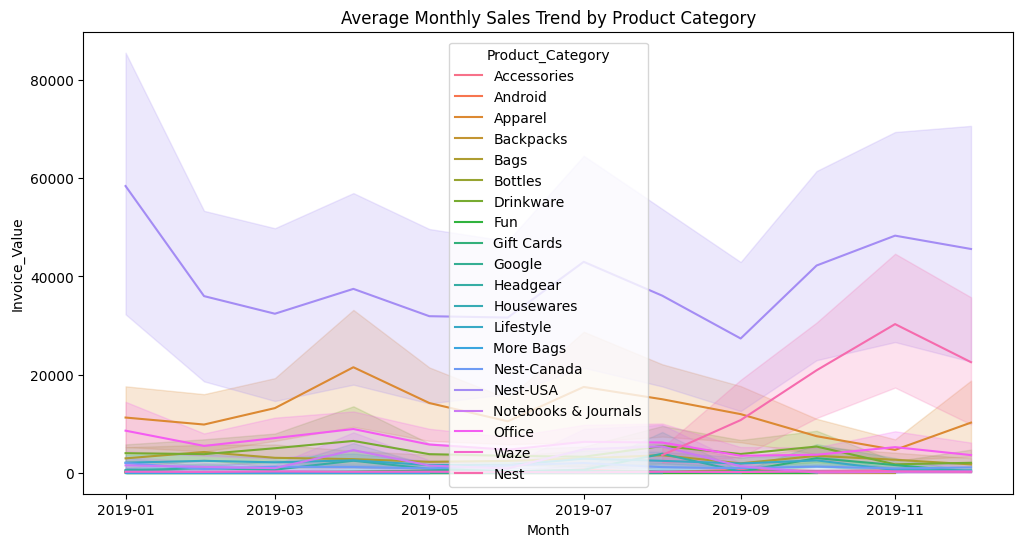

In [311]:
# Visualization Example
# Line plots → sales trends by month for each category.
# Heatmap → sales intensity across category × month or location × month.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_trends['Month'] = monthly_trends['Month'].dt.to_timestamp() 

sns.lineplot(data=monthly_trends, x='Month', y='Invoice_Value', hue='Product_Category')
plt.title("Average Monthly Sales Trend by Product Category")
plt.show()

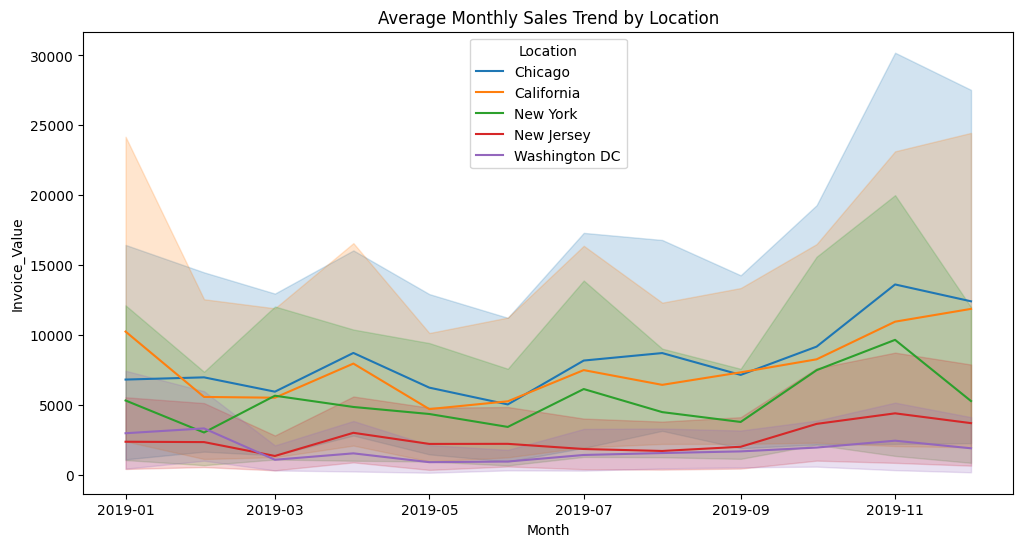

In [312]:
# For locations:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_trends, x='Month', y='Invoice_Value', hue='Location')
plt.title("Average Monthly Sales Trend by Location")
plt.show()

In [314]:
# Step 4: Detect Peak vs Off-Peak
# From these plots/tables you’ll spot:
# 📈 Peak months: High sales — festivals, holidays, seasonal demand.
# 📉 Off-peak months: Low sales — post-holiday dip, monsoon slump, etc.
# You can also calculate seasonality index:
monthly_index = (
    monthly_trends.groupby('Month')['Invoice_Value'].mean() / 
    monthly_trends['Invoice_Value'].mean()
).reset_index(name='Seasonality_Index')

print(monthly_index)

        Month  Seasonality_Index
0  2019-01-01           1.094260
1  2019-02-01           0.845348
2  2019-03-01           0.777345
3  2019-04-01           1.038204
4  2019-05-01           0.795679
5  2019-06-01           0.674461
6  2019-07-01           0.998405
7  2019-08-01           0.941608
8  2019-09-01           0.882545
9  2019-10-01           1.220281
10 2019-11-01           1.587193
11 2019-12-01           1.417447


In [ ]:
# The Seasonality Index is the ratio of sales in a given month to the overall average sales.
# > 1.0 → Above-average month (peak season).
# < 1.0 → Below-average month (off-peak season).
# = 1.0 → Exactly average demand.

In [ ]:
# Peak Season (Oct–Dec)
# Customers spend much higher than average (22%–59% more).
# Likely linked to festivals, Black Friday, Christmas, year-end sales.
# Action: Increase inventory, run premium promotions, allocate extra staff/logistics.
# Moderate Season (Jan & Apr)
# Demand is slightly above average.
# Action: New Year campaigns, seasonal refreshes.
# Off-Peak Season (Feb–Sep, esp. Jun)
# Sales dip 15–33% below average.
# Action: Stimulate demand with coupons, discounts, loyalty programs, and bundle offers.
# Keep leaner inventory to reduce holding costs.

# 20. Analyze daily sales trends to identify high-performing and low-performing days. What strategies can be implemented to boost sales on slower days?


In [315]:
merged_df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Year', 'Month', 'Day', 'GST',
       'Coupon_Code', 'Discount_pct', 'Date', 'Offline_Spend', 'Online_Spend',
       'Gender', 'Location', 'Tenure_Months', 'Invoice_Value', 'First_Month',
       'Customer_Type', 'Marketing_Spend', 'Customer_Segment',
       'Transaction_Month', 'Cohort_Month', 'Cohort_Index',
       'Delivery_Charge_Tier', 'GST_pct', 'GST_Tier'],
      dtype='object')

In [316]:
# Step 1: Aggregate daily sales 
# We can calculate total sales for each day using the Invoice_Value column:
import pandas as pd

# Ensure Transaction_Date is datetime
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

# Aggregate daily sales
daily_sales = merged_df.groupby('Transaction_Date').agg({
    'Invoice_Value': 'sum',
    'Transaction_ID': 'count'  # optional: number of transactions
}).rename(columns={'Invoice_Value': 'Total_Sales', 'Transaction_ID': 'Num_Transactions'}).reset_index()

# Preview
daily_sales.head()

,Transaction_Date,Total_Sales,Num_Transactions
0,2019-01-01,8439.47708,89
1,2019-01-02,14054.81838,115
2,2019-01-03,27306.41859,207
3,2019-01-04,17906.88365,169
4,2019-01-05,19784.49618,189


In [317]:
# Step 2: Identify high-performing and low-performing days
# We can classify days based on sales percentiles:
# Compute thresholds
high_threshold = daily_sales['Total_Sales'].quantile(0.75)
low_threshold = daily_sales['Total_Sales'].quantile(0.25)

# Label days
daily_sales['Performance'] = daily_sales['Total_Sales'].apply(
    lambda x: 'High' if x >= high_threshold else ('Low' if x <= low_threshold else 'Medium')
)

# Check distribution
daily_sales['Performance'].value_counts()

Performance
Medium    181
Low        92
High       92
Name: count, dtype: int64

In [318]:
# Step 3: Analyze trends
# We can see which weekdays or months are consistently high/low:
# Add weekday column
daily_sales['Weekday'] = daily_sales['Transaction_Date'].dt.day_name()

# Average sales by weekday
weekday_sales = daily_sales.groupby('Weekday')['Total_Sales'].mean().sort_values(ascending=False)
print(weekday_sales)

Weekday
Friday       16608.466405
Thursday     16249.126697
Wednesday    16012.560400
Sunday       13511.646902
Saturday     13238.902402
Tuesday       7371.565589
Monday        6819.090317
Name: Total_Sales, dtype: float64


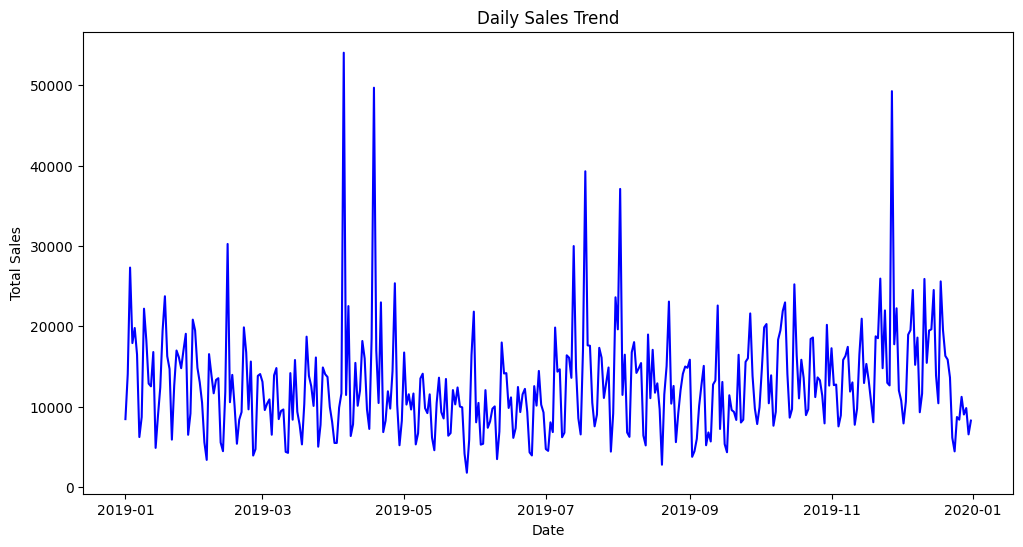

In [319]:
# We can also visualize trends:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Transaction_Date'], daily_sales['Total_Sales'], color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [321]:
# Step 5: Advanced Insight (Optional)
# You can combine weekday and customer segment to design targeted campaigns:
# Merge weekday with customer segments 
daily_segment_sales = merged_df.groupby([merged_df['Transaction_Date'], 'Customer_Segment']).agg({'Invoice_Value':'sum'}).reset_index()
print(daily_segment_sales)

     Transaction_Date Customer_Segment  Invoice_Value
0          2019-01-01             Gold     1702.20866
1          2019-01-01          Premium     1489.41616
2          2019-01-01           Silver     5240.03538
3          2019-01-01         Standard        7.81688
4          2019-01-02          Premium     8579.56404
5          2019-01-02           Silver     5475.25434
6          2019-01-03             Gold     1602.48544
7          2019-01-03          Premium     5758.13665
8          2019-01-03           Silver    18302.85938
9          2019-01-03         Standard     1642.93712
10         2019-01-04          Premium     9812.50413
11         2019-01-04           Silver     8094.37952
12         2019-01-05             Gold     5142.26465
13         2019-01-05          Premium     5846.95363
14         2019-01-05           Silver     2025.51022
15         2019-01-05         Standard     6769.76768
16         2019-01-06             Gold     1315.78674
17         2019-01-06       